In [12]:
%pip install numpy matplotlib

^C
Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip -q  install netCDF4

Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy
import matplotlib

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class KDTreeNode:
    def __init__(self, point, label, axis, left=None, right=None):
        self.point = point  # Point in space (x, y)
        self.label = label  # Land (1) or Water (0)
        self.axis = axis  # Axis to split on (0 for x, 1 for y)
        self.left = left  # Left child
        self.right = right  # Right child

class KDTree:
    def __init__(self, data, labels, depth=0):
        self.k = data.shape[1]  # Number of dimensions
        self.root = self.build_tree(data, labels, depth)

    def build_tree(self, data, labels, depth):
        if len(data) == 0:
            return None

        # Select axis based on depth so that axis cycles through all valid values
        axis = depth % self.k

        # Sort point list and choose median as pivot element
        sorted_data = data[data[:, axis].argsort()]
        median_index = len(sorted_data) // 2

        # Create node and construct subtrees
        return KDTreeNode(
            point=sorted_data[median_index],
            label=labels[median_index],
            axis=axis,
            left=self.build_tree(sorted_data[:median_index], labels[:median_index], depth + 1),
            right=self.build_tree(sorted_data[median_index + 1:], labels[median_index + 1:], depth + 1)
        )

    def query(self, point, node=None):
        if node is None:
            node = self.root

        if node is None:
            return None

        # Compare point with current node's point
        axis = node.axis
        if point[axis] < node.point[axis]:
            if node.left is not None:
                return self.query(point, node.left)
        elif point[axis] >= node.point[axis]:
            if node.right is not None:
                return self.query(point, node.right)

        # If leaf node, return the label (land or water)
        return node.label

    def draw(self, ax, node=None, min_bound=(0, 0), max_bound=(256, 256)):
        if node is None:
            node = self.root

        if node is None:
            return

        if node.axis == 0:
            # Vertical line
            ax.plot([node.point[0], node.point[0]], [min_bound[1], max_bound[1]], 'r-')
            left_max = (node.point[0], max_bound[1])
            right_min = (node.point[0], min_bound[1])
        else:
            # Horizontal line
            ax.plot([min_bound[0], max_bound[0]], [node.point[1], node.point[1]], 'b-')
            left_max = (max_bound[0], node.point[1])
            right_min = (min_bound[0], node.point[1])

        # Recursively draw the left and right subtrees
        if node.left is not None:
            self.draw(ax, node.left, min_bound, left_max)
        if node.right is not None:
            self.draw(ax, node.right, right_min, max_bound)

# Example usage
def main():
    # Create a sample map: 256x256 grid with random land and water points
    map_size = 256
    num_points = 1000
    np.random.seed(42)  # For reproducibility

    # Generate random points
    points = np.random.randint(0, map_size, size=(num_points, 2))

    # Randomly assign land (1) or water (0) labels
    labels = np.random.choice([0, 1], size=num_points)

    # Build the k-d tree
    kdtree = KDTree(points, labels)

    # Query some points
    query_points = [(60, 60), (120, 120), (200, 50), (250, 250)]
    for qp in query_points:
        result = kdtree.query(np.array(qp))
        terrain = 'Water' if result == 0 else 'Land' if result == 1 else 'Unknown'
        print(f"Point {qp} is on: {terrain}")

    # Visualize the k-d tree
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.scatter(points[:, 0], points[:, 1], c=labels, cmap='coolwarm', s=20, edgecolors='k')
    kdtree.draw(ax)
    ax.set_xlim(0, map_size)
    ax.set_ylim(0, map_size)
    ax.invert_yaxis()  # Invert y-axis to match array coordinates
    plt.title('k-d Tree Representation of Land and Water')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.show()

if __name__ == "__main__":
    main()


In [ ]:
import numpy as np


class Grid:  # togliere classe, usare funzioni
    def __init__(self, lat, lon, step=1.0):
        ni = int((lat[1] - lat[0])/step)
        
        nj = int((lon[1] - lon[0])/step)
        print(ni, nj)
        self.lat = np.linspace(lat[0], lat[0] + ni * step, ni + 1)
        self.lon = np.linspace(lon[0], lon[0] + nj * step, nj + 1)

    def __len__(self):
        return len(self.lat)*len(self.lon)


def main():
    a = Grid([37.7, 46.0], [11.8, 22.0], 1 / 36)
    lons, lats = np.meshgrid(a.lon, a.lat)
    # print(a.lat, a.lon)
    LonLat = (list(zip(lons.ravel(), lats.ravel())))
    # np.savetxt('__product/_a_Grafi/fname.csv', LonLat, fmt='%f', delimiter=',')


if '__main__' == __name__:
    main()


298 367
[11.8        11.82777778 11.85555556 ... 21.93888889 21.96666667
 21.99444444]
(np.float64(11.8), np.float64(37.7))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
"""
Sukhbinder
5 April 2017
Based on:
"""

def _rect_inter_inner(x1,x2):
    n1=x1.shape[0]-1
    n2=x2.shape[0]-1
    X1=np.c_[x1[:-1],x1[1:]]
    X2=np.c_[x2[:-1],x2[1:]]
    S1=np.tile(X1.min(axis=1),(n2,1)).T
    S2=np.tile(X2.max(axis=1),(n1,1))
    S3=np.tile(X1.max(axis=1),(n2,1)).T
    S4=np.tile(X2.min(axis=1),(n1,1))
    return S1,S2,S3,S4


def _rectangle_intersection_(x1,y1,x2,y2):
    S1,S2,S3,S4=_rect_inter_inner(x1,x2)
    S5,S6,S7,S8=_rect_inter_inner(y1,y2)

    C1=np.less_equal(S1,S2)
    C2=np.greater_equal(S3,S4)
    C3=np.less_equal(S5,S6)
    C4=np.greater_equal(S7,S8)

    ii,jj=np.nonzero(C1 & C2 & C3 & C4)
    return ii,jj


def intersection(x1,y1,x2,y2):
    """
INTERSECTIONS Intersections of curves.
   Computes the (x,y) locations where two curves intersect.  The curves
   can be broken with NaNs or have vertical segments.
usage:
x,y=intersection(x1,y1,x2,y2)
    Example:
    a, b = 1, 2
    phi = np.linspace(3, 10, 100)
    x1 = a*phi - b*np.sin(phi)
    y1 = a - b*np.cos(phi)
    x2=phi
    y2=np.sin(phi)+2
    x,y=intersection(x1,y1,x2,y2)
    plt.plot(x1,y1,c='r')
    plt.plot(x2,y2,c='g')
    plt.plot(x,y,'*k')
    plt.show()
    """
    ii,jj=_rectangle_intersection_(x1,y1,x2,y2)
    n=len(ii)

    dxy1=np.diff(np.c_[x1,y1],axis=0)
    dxy2=np.diff(np.c_[x2,y2],axis=0)

    T=np.zeros((4,n))
    AA=np.zeros((4,4,n))
    AA[0:2,2,:]=-1
    AA[2:4,3,:]=-1
    AA[0::2,0,:]=dxy1[ii,:].T
    AA[1::2,1,:]=dxy2[jj,:].T

    BB=np.zeros((4,n))
    BB[0,:]=-x1[ii].ravel()
    BB[1,:]=-x2[jj].ravel()
    BB[2,:]=-y1[ii].ravel()
    BB[3,:]=-y2[jj].ravel()

    for i in range(n):
        try:
            T[:,i]=np.linalg.solve(AA[:,:,i],BB[:,i])
        except:
            T[:,i]=np.NaN


    in_range= (T[0,:] >=0) & (T[1,:] >=0) & (T[0,:] <=1) & (T[1,:] <=1)

    xy0=T[2:,in_range]
    xy0=xy0.T
    return xy0[:,0],xy0[:,1]


if __name__ == '__main__':

    # a piece of a prolate cycloid, and am going to find
    a, b = 1, 2
    phi = np.linspace(3, 10, 100)
    x1 = a*phi - b*np.sin(phi)
    y1 = a - b*np.cos(phi)
    x2=phi
    y2=np.sin(phi)+2

    x,y=intersection(x1,y1,x2,y2)

    # plt.plot(x1,y1,c='r')
    # plt.plot(x2,y2,c='g')
    # plt.plot(x,y,'*k')
    # plt.show()


**Initial sea point visualization**

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Polygon
import numpy as np

# Constants
GRID_CELL_SIZE_KM = 15
EARTH_RADIUS_KM = 6371.0  # Earth's radius in kilometers

# Load the Natural Earth land polygons shapefile
land_shapefile_path = "natural-earth-vector-master/10m_physical/ne_10m_land.shp"
land_gdf = gpd.read_file(land_shapefile_path)

# Define the latitude and longitude range for the Indian subcontinent
lat_range = np.arange(0, 36, GRID_CELL_SIZE_KM / 111.32)
lon_range = np.arange(65, 100, GRID_CELL_SIZE_KM / (111.32 * np.cos(np.radians(20))))

# Create the map
fig = plt.figure(figsize=(14, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([65, 100, 0, 36], crs=ccrs.PlateCarree())

# Add coastlines and borders
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Plot points over the Indian subcontinent, excluding land regions
for lat in lat_range:
    for lon in lon_range:
        # Create a grid cell polygon (just for checking intersection)
        cell_polygon = Polygon([
            (lon, lat),
            (lon + GRID_CELL_SIZE_KM / (111.32 * np.cos(np.radians(lat))), lat),
            (lon + GRID_CELL_SIZE_KM / (111.32 * np.cos(np.radians(lat))), lat + GRID_CELL_SIZE_KM / 111.32),
            (lon, lat + GRID_CELL_SIZE_KM / 111.32),
            (lon, lat)
        ])
        
        # Check if the grid cell intersects with any land geometry
        if not land_gdf.intersects(cell_polygon).any():
            # Plot a point instead of a rectangle
            ax.scatter(lon, lat, color='blue', s=10, transform=ccrs.PlateCarree())

plt.title('Sea Regions with Points over Indian Subcontinent')
plt.show()


**Saving the generated points to the file**

In [ ]:
import geopandas as gpd
import numpy as np
import csv
from shapely.geometry import Polygon

# Constants
GRID_CELL_SIZE_KM = 25
EARTH_RADIUS_KM = 6371.0  # Earth's radius in kilometers

# Load the Natural Earth land polygons shapefile
land_shapefile_path = "natural-earth-vector-master/10m_physical/ne_10m_land.shp"
land_gdf = gpd.read_file(land_shapefile_path)

# Define the latitude and longitude range for the Indian subcontinent
lat_range = np.arange(0, 27, GRID_CELL_SIZE_KM / 111.32)
lon_range = np.arange(60, 100, GRID_CELL_SIZE_KM / (111.32 * np.cos(np.radians(20))))

# File to save grid cells
cells_file = 'sea_grid_cells_updated.csv'

# Helper function to check if a cell is land
def is_land(lat, lon):
    cell_polygon = Polygon([
        (lon, lat),
        (lon + GRID_CELL_SIZE_KM / (111.32 * np.cos(np.radians(lat))), lat),
        (lon + GRID_CELL_SIZE_KM / (111.32 * np.cos(np.radians(lat))), lat + GRID_CELL_SIZE_KM / 111.32),
        (lon, lat + GRID_CELL_SIZE_KM / 111.32),
        (lon, lat)
    ])
    return land_gdf.intersects(cell_polygon).any()

# Save grid cells with land information to file
with open(cells_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Latitude', 'Longitude', 'Is_Land'])

    # Process each point
    for lat in lat_range:
        for lon in lon_range:
            land = 1 if is_land(lat, lon) else 0
            writer.writerow([lat, lon, land])

print(f"Grid cells with land information have been saved to {cells_file}.")


Grid cells with land information have been saved to sea_grid_cells_updated.csv.


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Polygon
import numpy as np
import csv

# Constants
GRID_CELL_SIZE_KM = 25
EARTH_RADIUS_KM = 6371.0  # Earth's radius in kilometers

# Load the Natural Earth land polygons shapefile
land_shapefile_path = "natural-earth-vector-master/10m_physical/ne_10m_land.shp"
land_gdf = gpd.read_file(land_shapefile_path)

# Define the latitude and longitude range for the Indian subcontinent
lat_range = np.arange(0, 36, GRID_CELL_SIZE_KM / 111.32)
lon_range = np.arange(65, 100, GRID_CELL_SIZE_KM / (111.32 * np.cos(np.radians(20))))

# File to save points with neighbors
points_file = 'sea_points_with_neighbors.csv'

# Helper function to check if a point is valid
def is_valid_point(lat, lon):
    cell_polygon = Polygon([
        (lon, lat),
        (lon + GRID_CELL_SIZE_KM / (111.32 * np.cos(np.radians(lat))), lat),
        (lon + GRID_CELL_SIZE_KM / (111.32 * np.cos(np.radians(lat))), lat + GRID_CELL_SIZE_KM / 111.32),
        (lon, lat + GRID_CELL_SIZE_KM / 111.32),
        (lon, lat)
    ])
    return not land_gdf.intersects(cell_polygon).any()

# Save points with valid neighbors to file
with open(points_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Latitude', 'Longitude', 'Valid_Neighbors'])

    # Process each point
    for lat in lat_range:
        for lon in lon_range:
            if is_valid_point(lat, lon):
                neighbors = []

                # Check the 8 possible neighboring cells
                for d_lat in [-GRID_CELL_SIZE_KM / 111.32, 0, GRID_CELL_SIZE_KM / 111.32]:
                    for d_lon in [-GRID_CELL_SIZE_KM / (111.32 * np.cos(np.radians(lat))), 0, GRID_CELL_SIZE_KM / (111.32 * np.cos(np.radians(lat)))]:
                        if d_lat != 0 or d_lon != 0:  # Skip the center point itself
                            neighbor_lat = lat + d_lat
                            neighbor_lon = lon + d_lon
                            if 0 <= neighbor_lat <= 36 and 65 <= neighbor_lon <= 100:  # Ensure within bounds
                                if is_valid_point(neighbor_lat, neighbor_lon):
                                    neighbors.append(f"({neighbor_lat},{neighbor_lon})")

                # Write the point and its valid neighbors to the file
                writer.writerow([lat, lon, ';'.join(neighbors)])

print(f"Sea region points with neighbors have been saved to {points_file}.")


Sea region points with neighbors have been saved to sea_points_with_neighbors.csv.


In [ ]:
import netCDF4 as nc
import numpy as np
import geopandas as gpd
import csv
from shapely.geometry import Polygon

# Constants
GRID_CELL_SIZE_KM = 25
EARTH_RADIUS_KM = 6371.0  # Earth's radius in kilometers

# Load the Natural Earth land polygons shapefile
land_shapefile_path = "natural-earth-vector-master/10m_physical/ne_10m_land.shp"
land_gdf = gpd.read_file(land_shapefile_path)

# Load the GEBCO netCDF file
gebco_file_path = 'C:/Desktop/gebco_2024_sub_ice_topo/GEBCO_2024_sub_ice_topo.nc'
dataset = nc.Dataset(gebco_file_path)

# Define the latitude and longitude range for the Indian subcontinent
lat_min, lat_max = 0, 36
lon_min, lon_max = 65, 100

# File to save grid cells
cells_file = 'sea_grid_cells_with_land_and_bathymetry.csv'

# Helper function to check if a cell is land
def is_land(lat, lon):
    cell_polygon = Polygon([
        (lon, lat),
        (lon + GRID_CELL_SIZE_KM / (111.32 * np.cos(np.radians(lat))), lat),
        (lon + GRID_CELL_SIZE_KM / (111.32 * np.cos(np.radians(lat))), lat + GRID_CELL_SIZE_KM / 111.32),
        (lon, lat + GRID_CELL_SIZE_KM / 111.32),
        (lon, lat)
    ])
    return land_gdf.intersects(cell_polygon).any()

# Save grid cells with land and bathymetry information to file
with open(cells_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Latitude', 'Longitude', 'Is_Land', 'Bathymetry_Depth'])

    # Set chunk size for processing
    chunk_size = 1000

    # Get the total size of latitude and longitude data
    total_lat = dataset.dimensions['lat'].size
    total_lon = dataset.dimensions['lon'].size

    # Iterate over latitude in chunks
    for lat_start in range(0, total_lat, chunk_size):
        lat_end = min(lat_start + chunk_size, total_lat)
        latitudes = dataset.variables['lat'][lat_start:lat_end]

        # Check if these latitudes are in the required range
        valid_lat_indices = np.where((latitudes >= lat_min) & (latitudes <= lat_max))[0]
        if valid_lat_indices.size == 0:
            continue

        # Iterate over longitude in chunks
        for lon_start in range(0, total_lon, chunk_size):
            lon_end = min(lon_start + chunk_size, total_lon)
            longitudes = dataset.variables['lon'][lon_start:lon_end]

            # Check if these longitudes are in the required range
            valid_lon_indices = np.where((longitudes >= lon_min) & (longitudes <= lon_max))[0]
            if valid_lon_indices.size == 0:
                continue

            # Process only the valid latitude and longitude indices
            for lat_idx in valid_lat_indices:
                for lon_idx in valid_lon_indices:
                    lat = latitudes[lat_idx]
                    lon = longitudes[lon_idx]

                    # Check if the grid cell is land
                    land = 1 if is_land(lat, lon) else 0

                    # Access the bathymetry data for the specific lat/lon
                    bathymetry_depth = dataset.variables['elevation'][lat_start + lat_idx, lon_start + lon_idx]

                    # Write the results to the CSV file
                    writer.writerow([lat, lon, land, bathymetry_depth])

print(f"Grid cells with land and bathymetry information have been saved to {cells_file}.")


In [ ]:
import netCDF4 as nc


# Open the netCDF file
file_path = 'C:/Desktop/gebco_2024_sub_ice_topo/GEBCO_2024_sub_ice_topo.nc'
dataset = nc.Dataset(file_path)

# List all variable names
print("Variables in the dataset:")
for var in dataset.variables:
    print(var)

# Optionally, you can also print the dimensions and attributes
print("\nDimensions in the dataset:")
for dim in dataset.dimensions:
    print(dim, dataset.dimensions[dim].size)

print("\nGlobal attributes:")
for attr in dataset.ncattrs():
    print(attr, getattr(dataset, attr))


# Close the dataset
dataset.close()


In [ ]:
# %pip install scikit-learn
%pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.neighbors import KDTree
import numpy as np
from geopy.distance import great_circle

# Example grid cells with latitudes and longitudes
grid_cells = [(25.60, 80.12), (25.70, 80.22), (25.80, 80.32)]

# Define a custom distance function
def haversine_distance(x, y):
    point1 = (x[0], x[1])
    point2 = (y[0], y[1])
    return great_circle(point1, point2).kilometers

# Build the KDTree with the custom metric
tree = KDTree(grid_cells, metric=haversine_distance)

# Query the nearest neighbor
query_point = np.array([[25.65, 80.15]])
distance, index = tree.query(query_point, k=1)

# Retrieve the nearest grid cell
nearest_cell = grid_cells[index[0][0]]

print(f"Nearest Cell: {nearest_cell}, Haversine Distance: {distance[0][0]} km")


ValueError: metric PyFuncDistance64 is not valid for KDTree64

In [ ]:
from sklearn.neighbors import BallTree
import numpy as np

# Function to convert latitude and longitude to radians
def to_radians(coords):
    return np.radians(coords)

# Example grid cells with latitudes and longitudes
grid_cells = np.array([
    (25.60, 80.12),
    (25.70, 80.22),
    (25.80, 80.32)
])

# Convert the grid cells to radians
grid_cells_rad = to_radians(grid_cells)

# Build the BallTree with the Haversine metric
tree = BallTree(grid_cells_rad, metric='haversine')

# Query point (convert to radians)
query_point = np.array([[25.65, 80.15]])
query_point_rad = to_radians(query_point)

# Query the nearest neighbor (returns distance in radians)
dist, idx = tree.query(query_point_rad, k=1)

# Convert distance from radians to kilometers (radius of Earth ~6371 km)
nearest_cell = grid_cells[idx[0][0]]
nearest_distance_km = dist[0][0] * 6371.0

print(f"Nearest Cell: {nearest_cell}, Haversine Distance: {nearest_distance_km:.2f} km")


Nearest Cell: [25.6  80.12], Haversine Distance: 6.32 km


**Bathymetry with latitude and longitude**

In [ ]:
import geopandas as gpd
import numpy as np
import csv
import netCDF4 as nc
from shapely.geometry import Polygon

GRID_CELL_SIZE_KM = 10
EARTH_RADIUS_KM = 6371.0  

# land_shapefile_path = "natural-earth-vector-master/10m_physical/ne_10m_land.shp"
# land_gdf = gpd.read_file(land_shapefile_path)

# bound box for india with 10km cells
lat_range = np.arange(0, 26, GRID_CELL_SIZE_KM / 111.32)
lat_range = lat_range[::-1] #reversing so that we start the array from pakisthan region
lon_range = np.arange(60, 100, GRID_CELL_SIZE_KM / (111.32 * np.cos(np.radians(20))))

points_file = 'grid_points_with_bathymetry_updated.csv'


gebco_file_path = 'C:/Desktop/gebco_2024_sub_ice_topo/GEBCO_2024_sub_ice_topo.nc'
dataset = nc.Dataset(gebco_file_path)

latitudes = dataset.variables['lat']
longitudes = dataset.variables['lon']
bathymetry = dataset.variables['elevation']

with open(points_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Latitude', 'Longitude', 'Is_Land', 'Bathymetry_Depth', 'Row', 'Column'])
    
    rowNum = 0
    colNum = 0

    for lat in lat_range:
        colNum = 0
        for lon in lon_range:
            lat_idx = np.searchsorted(latitudes[:], lat)
            lon_idx = np.searchsorted(longitudes[:], lon)
            bathymetry_depth = bathymetry[lat_idx, lon_idx]
            
            is_land = bathymetry_depth >= 0  # Typically, bathymetry values >= 0 indicate land
            if is_land:
                writer.writerow([lat, lon, 1, bathymetry_depth, rowNum, colNum])
            else:
                writer.writerow([lat, lon, 0, bathymetry_depth, ])

            colNum += 1
        rowNum += 1

print(f"Grid points with bathymetry and land/sea status have been saved to {points_file}.")


Grid points with bathymetry and land/sea status have been saved to grid_points_with_bathymetry_updated.csv.


In [ ]:
from sklearn.neighbors import KDTree
import numpy as np

# Constants
EARTH_RADIUS_KM = 6371.0  # Earth's radius in kilometers

# Function to convert lat/lon to Cartesian coordinates
def lat_lon_to_cartesian(lat, lon):
    lat_rad = np.radians(lat)
    lon_rad = np.radians(lon)
    x = np.cos(lat_rad) * np.cos(lon_rad)
    y = np.cos(lat_rad) * np.sin(lon_rad)
    z = np.sin(lat_rad)
    return np.array([x, y, z])

# Example grid cells with latitudes and longitudes
grid_cells = np.array([
    [25.60, 80.12],
    [25.70, 80.22],
    [25.80, 80.32]
])

# Convert the grid cells to Cartesian coordinates
cartesian_grid_cells = np.array([lat_lon_to_cartesian(lat, lon) for lat, lon in grid_cells])

# Build the KDTree using Cartesian coordinates
tree = KDTree(cartesian_grid_cells)

# Convert query point to Cartesian coordinates
query_point = lat_lon_to_cartesian(25.70, 80.22).reshape(1, -1)

# Query the KDTree for the nearest neighbor
dist, ind = tree.query(query_point, k=1)

# Retrieve the nearest cell in Cartesian coordinates
nearest_cell_cartesian = cartesian_grid_cells[ind[0][0]]

# Convert the Cartesian coordinates back to lat/lon if needed
# But here, we will directly output the index and distance
nearest_distance = dist[0][0] * EARTH_RADIUS_KM  # Convert the distance back to kilometers

print(f"Nearest Cell Index: {ind[0][0]}, Distance: {nearest_distance} km")


Nearest Cell Index: 1, Distance: 0.0 km


**Grid representation of Graph**

In [ ]:
import csv
import numpy as np

class GridCell:
    def __init__(self, lat, lon, is_land, bathymetry_depth):
        self.lat = lat
        self.lon = lon
        self.is_land = is_land
        self.bathymetry_depth = bathymetry_depth

# Constants
lat_start, lat_end = 0, 26
lon_start, lon_end = 60, 100
cell_size_km = 10

# Calculate number of rows and columns based on grid size
num_rows = np.arange(0, 26, GRID_CELL_SIZE_KM / 111.32)
num_rows = num_rows.__len__()
num_cols = np.arange(60, 100, GRID_CELL_SIZE_KM / (111.32 * np.cos(np.radians(20))))
num_cols = num_cols.__len__()
print(num_cols*num_rows)


# Initialize a numpy array for the grid
grid = np.empty((num_rows, num_cols), dtype=object)

# Row index starts from the bottom
row_idx = num_rows - 1
col_idx = 0

with open('grid_points_with_bathymetry_updated.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header

    for row in reader:
        lat, lon, is_land, bathymetry_depth, i , j = float(row[0]), float(row[1]), int(row[2]), float(row[3]), int(row[4]), int(row[5])

        # Create GridCell object
        cell = GridCell(lat, lon, is_land, bathymetry_depth)

        # Place the cell in the grid
        grid[i,j] = cell

        # Update column index
        


121510
25.96119295724039   60.0


In [ ]:
import csv

class GridCell:
    def __init__(self, lat, lon, is_land, bathymetry_depth):
        self.lat = lat
        self.lon = lon
        self.is_land = is_land
        self.bathymetry_depth = bathymetry_depth

lat_start, lat_end = 0, 26
lon_start, lon_end = 60, 100
cell_size_km = 10

num_rows = int((lat_end - lat_start) * 111.32 / cell_size_km)
num_cols = int((lon_end - lon_start) * 111.32 / (cell_size_km * np.cos(np.radians((lat_end + lat_start) / 2))))

# Initialize an empty list of lists
grid = [[] for _ in range(num_rows)]

# Populate the grid
with open('grid_points_with_bathymetry.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)  # Skip the header
    
    for row in reader:
        lat, lon, is_land, bathymetry_depth = float(row[0]), float(row[1]), int(row[2]), float(row[3])
        
        # Compute the row and column indices
        row_idx = int((lat_end - lat) * 111.32 / cell_size_km)
        col_idx = int((lon - lon_start) * 111.32 / (cell_size_km * np.cos(np.radians((lat_end + lat_start) / 2))))
        
        # Ensure the row index is within bounds
        if 0 <= row_idx < num_rows and 0 <= col_idx < num_cols:
            # Ensure the row list is large enough
            while len(grid[row_idx]) <= col_idx:
                grid[row_idx].append(None)
            
            # Assign the GridCell object
            grid[row_idx][col_idx] = GridCell(lat, lon, is_land, bathymetry_depth)

print(f"Grid size in memory: {sum(len(row) * 48 for row in grid)} bytes")
print(grid[0][0].is_land)

Grid size in memory: 6325632 bytes
1


In [ ]:
import geopandas as gpd
import netCDF4 as nc 

bf =  "WTEB_20240818v10001.nc"
bdf = nc.Dataset(bf)

print(bdf)


<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    contact_email: samos@coaps.fsu.edu
    contact_info: Center for Ocean-Atmospheric Prediction Studies, The Florida State University, Tallahassee, FL, 32306-2840, USA
    Cruise_id: Cruise_id undefined for now
    Data_modification_date: 19- 8-2024 17:45: 0 UTC
    data_provider: Fairweather CO
    elev: 0
    end_date_time: 2024/08/18 -- 23:59  UTC
    EXPOCODE: EXPOCODE undefined for now
    facility: NOAA
    fsu_version: 100
    ID: WTEB
    IMO: 006710920
    Metadata_modification_date: 19- 8-2024 13:45: 1 EDT
    platform: NOAA SCS
    platform_version: 5.0.70.0
    receipt_order: 01
    site: FAIRWEATHER
    start_date_time: 2024/08/18 -- 00:00  UTC
    title: FAIRWEATHER Meteorological Data
    dimensions(sizes): time(1439), flag_strlen(12), h_num(50), history_strlen(236)
    variables(dimensions): int32 time(time), float32 lat(time), float32 lon(time), float32 PL_HD(time), float3

**Haversine**

In [ ]:
import numpy as np

# Haversine formula to calculate the great-circle distance between two points on the Earth
def haversine(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    # Distance in kilometers (Earth's radius = 6371 km)
    distance_km = 6371.0 * c
    return distance_km


In [ ]:
import csv

# File containing the saved points with neighbors
points_file = 'data/sea_points_with_neighbors.csv'

# Load points with neighbors from file
def load_points_with_neighbors(points_file):
    points_with_neighbors = []
    with open(points_file, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header
        for row in reader:
            lat, lon = float(row[0]), float(row[1])
            neighbors = row[2].split(';') if row[2] else []
            neighbors = [(float(n.split(',')[0].strip('()')), float(n.split(',')[1].strip('()'))) for n in neighbors]
            points_with_neighbors.append((lat, lon, neighbors))
    return points_with_neighbors

# Load the points with neighbors
sea_points_with_neighbors = load_points_with_neighbors(points_file)

# Example: Print the first point and its neighbors
# print("First point and its valid neighbors:")
# print(f"Point: {sea_points_with_neighbors[0][0]}, {sea_points_with_neighbors[0][1]}")
# print("Neighbors:", sea_points_with_neighbors[0][2])


adjList = {}
for i in sea_points_with_neighbors:
    adjList[(i[0], i[1])] = i[2]




**Finding The Nearest Neighbour**

In [ ]:
from scipy.spatial import KDTree
import csv
import numpy as np

# Load valid ocean points from file
def load_valid_ocean_points(points_file):
    ocean_points = []
    with open(points_file, 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip header
        for row in reader:
            lat, lon = float(row[0]), float(row[1])
            ocean_points.append((lat, lon))
    return np.array(ocean_points)

# Load the points

valid_ocean_points_file = 'data/sea_points_with_neighbors.csv'

valid_ocean_points = load_valid_ocean_points(valid_ocean_points_file)

ocean_tree = KDTree(valid_ocean_points)

# Build a KDTree for efficient nearest neighbor search
def find_nearest_ocean_cell(lat, lon):
    distance_deg, index = ocean_tree.query((lat, lon))
    nearest_ocean_cell = valid_ocean_points[index]
    distance_km = haversine(lat, lon, nearest_ocean_cell[0], nearest_ocean_cell[1])
    return nearest_ocean_cell, distance_deg, distance_km

# Example: find the nearest ocean cell to a specific point
lat, lon = 24.345, 65.4522  # Example point
nearest_ocean_cell, distance_deg, distance_km = find_nearest_ocean_cell(lat, lon)
print(f"Nearest ocean cell to ({lat}, {lon}) is at {nearest_ocean_cell}")
print(f"Distance: {distance_deg} degrees, {distance_km:.2f} kilometers")

Nearest ocean cell to (24.345, 65.4522) is at [24.25440172 65.47798139]
Distance: 0.09419515741861106 degrees, 10.41 kilometers


Iteration 1/100, Best Distance: 16268701.887679582
Iteration 2/100, Best Distance: 16268701.887679582
Iteration 3/100, Best Distance: 16268701.887679582
Iteration 4/100, Best Distance: 16268701.887679582
Iteration 5/100, Best Distance: 16268701.887679582
Iteration 6/100, Best Distance: 16268701.887679582
Iteration 7/100, Best Distance: 16268701.887679582
Iteration 8/100, Best Distance: 16268701.887679582
Iteration 9/100, Best Distance: 16268701.887679582
Iteration 10/100, Best Distance: 16268701.887679582
Iteration 11/100, Best Distance: 16268701.887679582
Iteration 12/100, Best Distance: 16268701.887679582
Iteration 13/100, Best Distance: 16268701.887679582
Iteration 14/100, Best Distance: 16268701.887679582
Iteration 15/100, Best Distance: 16268701.887679582
Iteration 16/100, Best Distance: 16268701.887679582
Iteration 17/100, Best Distance: 16268701.887679582
Iteration 18/100, Best Distance: 16268701.887679582
Iteration 19/100, Best Distance: 16268701.887679582
Iteration 20/100, Bes

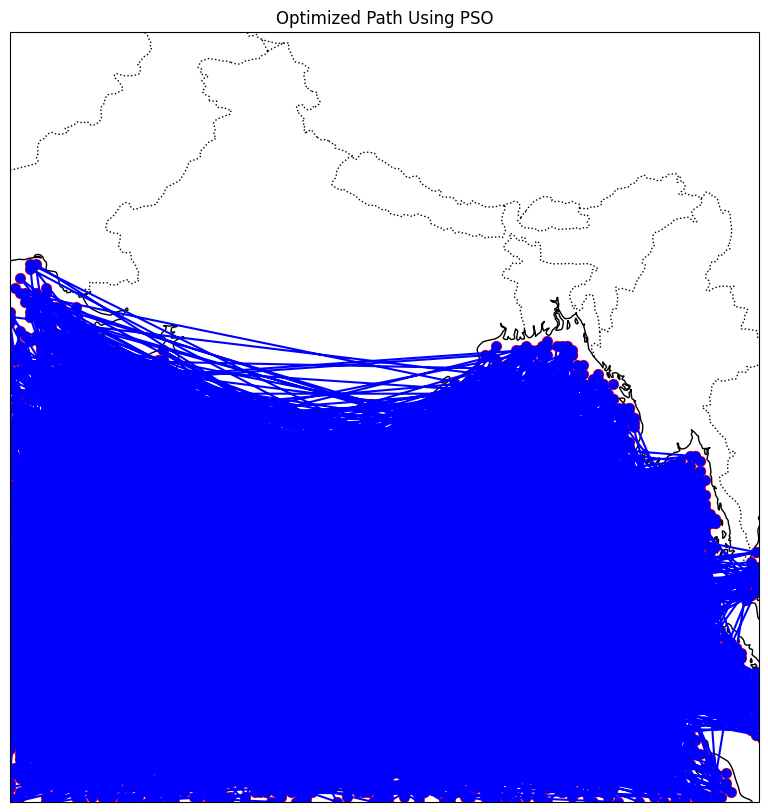

Best path found: [(13.0827, 80.2707), (12.576356449874238, 82.68531152605541), (10.555156306144449, 85.31420918533392), (13.923823212360762, 72.16972088894138), (4.491555874955085, 99.89264165951474), (13.250089831117501, 85.31420918533392), (4.940711462450594, 90.33301380759289), (10.106000718648941, 74.55962785192185), (13.250089831117501, 96.068790518746), (10.779734099892204, 92.9619114668714), (12.127200862378729, 73.36467437043162), (6.512756018684873, 89.61604171869875), (9.207689543657924, 72.88669297783552), (8.533956162414661, 73.36467437043162), (15.720445562342798, 92.24493937797726), (12.800934243621992, 68.1068790518746), (5.389867049946102, 70.73577671115311), (7.4110671936758905, 91.52796728908312), (7.186489399928136, 85.31420918533392), (10.779734099892204, 84.11925570384369), (16.169601149838307, 83.1632929186515), (1.5720445562342797, 80.05641386677691), (13.474667624865255, 91.04998589648703), (6.288178224937119, 73.36467437043162), (2.470355731225297, 76.710544118

In [ ]:
import numpy as np
import random
import csv
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from math import radians, sin, cos, sqrt, atan2

# Constants for PSO
NUM_PARTICLES = 30
NUM_ITERATIONS = 100
W = 0.5  # Inertia weight
C1 = 1.5  # Cognitive constant
C2 = 1.5  # Social constant
EARTH_RADIUS_KM = 6371.0

# Load ocean cells from the CSV file
def load_ocean_cells(file_path):
    cells = []
    with open(file_path, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        next(csvreader)  # Skip header
        for row in csvreader:
            lat, lon = float(row[0]), float(row[1])
            cells.append((lat, lon))
    return cells

# Compute distance in kilometers between two points
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return EARTH_RADIUS_KM * c

# Compute the total distance of a path with start and end points
def path_distance(path, start_point, end_point):
    total_distance = haversine(start_point[0], start_point[1], path[0][0], path[0][1])
    for i in range(len(path) - 1):
        total_distance += haversine(path[i][0], path[i][1], path[i + 1][0], path[i + 1][1])
    total_distance += haversine(path[-1][0], path[-1][1], end_point[0], end_point[1])
    return total_distance

# Convert a permutation of indices to a path with start and end points
def permutation_to_path(permutation, ocean_cells, start_point, end_point):
    path = [ocean_cells[i] for i in permutation]
    path = [start_point] + path + [end_point]
    return path

# PSO implementation
def run_pso(ocean_cells, start_point, end_point):
    num_cells = len(ocean_cells)
    particles = [random.sample(range(num_cells), num_cells) for _ in range(NUM_PARTICLES)]
    velocities = [np.zeros(num_cells) for _ in range(NUM_PARTICLES)]
    best_personal_positions = particles.copy()
    
    # Initialize best personal distances with start and end points
    best_personal_distances = [
        path_distance(permutation_to_path(p, ocean_cells, start_point, end_point), start_point, end_point)
        for p in particles
    ]
    
    # Initialize best global position and distance
    best_global_position = min(
        particles,
        key=lambda p: path_distance(permutation_to_path(p, ocean_cells, start_point, end_point), start_point, end_point)
    )
    best_global_distance = path_distance(permutation_to_path(best_global_position, ocean_cells, start_point, end_point), start_point, end_point)

    for iteration in range(NUM_ITERATIONS):
        for i, particle in enumerate(particles):
            r1, r2 = np.random.rand(num_cells), np.random.rand(num_cells)
            current_position = np.array(particle)
            personal_best_position = np.array(best_personal_positions[i])
            global_best_position = np.array(best_global_position)

            velocities[i] = (W * velocities[i] +
                             C1 * r1 * (personal_best_position - current_position) +
                             C2 * r2 * (global_best_position - current_position))

            new_position = (current_position + velocities[i]).astype(int) % num_cells
            new_position = np.clip(new_position, 0, num_cells - 1)

            new_path = permutation_to_path(new_position, ocean_cells, start_point, end_point)
            current_distance = path_distance(new_path, start_point, end_point)

            if current_distance < best_personal_distances[i]:
                best_personal_distances[i] = current_distance
                best_personal_positions[i] = new_position
            if current_distance < best_global_distance:
                best_global_distance = current_distance
                best_global_position = new_position

        print(f"Iteration {iteration + 1}/{NUM_ITERATIONS}, Best Distance: {best_global_distance}")

    return permutation_to_path(best_global_position, ocean_cells, start_point, end_point)


# Plot the path on a map
def plot_path_on_map(path):
    # Create the map
    fig = plt.figure(figsize=(14, 10))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.set_extent([65, 100, 0, 36], crs=ccrs.PlateCarree())

    # Add coastlines and borders
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')

    # Extract latitudes and longitudes from the path
    lats, lons = zip(*path)

    # Plot the path
    ax.plot(lons, lats, marker='o', color='blue', linestyle='-', transform=ccrs.PlateCarree())
    ax.scatter(lons, lats, color='red', s=50, transform=ccrs.PlateCarree())

    plt.title('Optimized Path Using PSO')
    plt.show()

# Define start and end points
start_point = (13.0827, 80.2707)  # Approx Chennai
end_point = (8.8464, 77.5290)     # Approx Tuticorin

# Load ocean cells
ocean_cells = load_ocean_cells('data/sea_points_with_neighbors.csv')

# Run PSO to find the shortest path
best_path = run_pso(ocean_cells, start_point, end_point)

# Plot the best path
plot_path_on_map(best_path)
print("Best path found:", best_path)
print("Distance of the best path:", path_distance(best_path, start_point, end_point), "km")


In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.spatial import KDTree
import heapq

# Constants for GA
POPULATION_SIZE = 50
MUTATION_RATE = 0.01
NUM_GENERATIONS = 100
GRID_CELL_SIZE_KM = 25
EARTH_RADIUS_KM = 6371.0  # Earth's radius in kilometers

# Function to calculate distance between two points
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return EARTH_RADIUS_KM * c

# Load the cells and neighbors
def load_cells_with_neighbors(file_path):
    cells = {}
    with open(file_path, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        next(csvreader)  # Skip header
        for row in csvreader:
            lat, lon, neighbors_str = row
            lat, lon = float(lat), float(lon)
            neighbors = [tuple(map(float, n.strip("()").split(','))) for n in neighbors_str.split(';') if n]
            cells[(lat, lon)] = neighbors
    return cells

# Generate initial population of paths
def generate_initial_population(cells, start, end, size=POPULATION_SIZE):
    all_nodes = list(cells.keys())
    population = []
    for _ in range(size):
        path = [start] + random.sample(all_nodes, len(all_nodes) - 2) + [end]
        population.append(path)
    return population

# Calculate total distance of a path
def calculate_total_distance(path):
    total_distance = 0
    for i in range(len(path) - 1):
        total_distance += haversine(path[i][0], path[i][1], path[i + 1][0], path[i + 1][1])
    return total_distance

# Crossover two paths
def crossover(parent1, parent2):
    size = len(parent1)
    start, end = sorted(random.sample(range(size), 2))
    child = [None]*size
    child[start:end] = parent1[start:end]
    fill_pos = [pos for pos in parent2 if pos not in child]
    fill_idx = [i for i, x in enumerate(child) if x is None]
    for i in range(len(fill_idx)):
        child[fill_idx[i]] = fill_pos[i]
    return child

# Mutate a path
def mutate(path):
    idx1, idx2 = random.sample(range(len(path)), 2)
    path[idx1], path[idx2] = path[idx2], path[idx1]

# GA main function
def genetic_algorithm(cells, start, end):
    population = generate_initial_population(cells, start, end)
    
    for generation in range(NUM_GENERATIONS):
        population.sort(key=lambda path: calculate_total_distance(path))
        best_path = population[0]
        best_distance = calculate_total_distance(best_path)
        
        # Selection
        selected = population[:POPULATION_SIZE // 2]
        
        # Crossover and Mutation
        new_population = selected[:]
        while len(new_population) < POPULATION_SIZE:
            parent1, parent2 = random.sample(selected, 2)
            child = crossover(parent1, parent2)
            if random.random() < MUTATION_RATE:
                mutate(child)
            new_population.append(child)
        
        population = new_population
        
        print(f"Generation {generation + 1}/{NUM_GENERATIONS}, Best Distance: {best_distance}")

    return population[0]

# Load cells with neighbors
cells = load_cells_with_neighbors('data/sea_points_with_neighbors.csv')

# Define start and end points
start_point = (11.228889687387712,71.93073019264334)  # Approx Chennai
end_point = (11.228889687387712,87.70411614831438)     # Approx Tuticorin

# Run Genetic Algorithm to find the shortest path
best_path = genetic_algorithm(cells, start_point, end_point)
print("Best path found:", best_path)
print("Distance of the best path:", calculate_total_distance(best_path), "km")

# Plotting
plt.figure(figsize=(12, 8))
plt.plot([p[1] for p in best_path], [p[0] for p in best_path], marker='o', linestyle='-', color='b')
plt.title('Best Path Found by Genetic Algorithm')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


IndexError: list index out of range

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Polygon, Point
import numpy as np
import heapq

# Constants
GRID_CELL_SIZE_KM = 25
EARTH_RADIUS_KM = 6371.0  # Earth's radius in kilometers

# Function to calculate distance between two points
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return EARTH_RADIUS_KM * c

# Load the shapefile
shapefile_path = 'WB_Coastlines_10m/WB_Coastlines_10m.shp'
gdf = gpd.read_file(shapefile_path)

# Define the latitude and longitude range for the region
lat_range = np.arange(7.5, 9.5, GRID_CELL_SIZE_KM / 111.32)
lon_range = np.arange(78, 80, GRID_CELL_SIZE_KM / (111.32 * np.cos(np.radians(8.5))))

# Create a grid of nodes (center of grid cells)
nodes = {}
for lat in lat_range:
    for lon in lon_range:
        cell_center = (lat, lon)
        cell_polygon = Polygon([
            (lon, lat),
            (lon + GRID_CELL_SIZE_KM / (111.32 * np.cos(np.radians(lat))), lat),
            (lon + GRID_CELL_SIZE_KM / (111.32 * np.cos(np.radians(lat))), lat + GRID_CELL_SIZE_KM / 111.32),
            (lon, lat + GRID_CELL_SIZE_KM / 111.32),
            (lon, lat)
        ])
        # Only consider sea regions
        if not gdf.intersects(cell_polygon).any():
            nodes[cell_center] = {'pos': cell_center, 'neighbors': []}

# Connect nodes to their neighbors (4-connected grid)
for node in nodes:
    lat, lon = node
    neighbors = [
        (lat + GRID_CELL_SIZE_KM / 111.32, lon),  # North
        (lat - GRID_CELL_SIZE_KM / 111.32, lon),  # South
        (lat, lon + GRID_CELL_SIZE_KM / (111.32 * np.cos(np.radians(lat)))),  # East
        (lat, lon - GRID_CELL_SIZE_KM / (111.32 * np.cos(np.radians(lat))))   # West
    ]
    for neighbor in neighbors:
        if neighbor in nodes:
            distance = haversine(lat, lon, neighbor[0], neighbor[1])
            nodes[node]['neighbors'].append((neighbor, distance))

# Dijkstra's algorithm to find the shortest path
def dijkstra(nodes, start, end):
    queue = [(0, start)]
    distances = {node: float('inf') for node in nodes}
    distances[start] = 0
    previous_nodes = {node: None for node in nodes}

    while queue:
        current_distance, current_node = heapq.heappop(queue)

        if current_distance > distances[current_node]:
            continue

        for neighbor, weight in nodes[current_node]['neighbors']:
            distance = current_distance + weight

            if distance < distances[neighbor]:
                distances[neighbor] = distance
                previous_nodes[neighbor] = current_node
                heapq.heappush(queue, (distance, neighbor))

    path = []
    node = end
    while previous_nodes[node] is not None:
        path.append(node)
        node = previous_nodes[node]
    path.append(start)
    path.reverse()

    return path

# Define the start and end points (Chennai and Tuticorin)
start_point = min(nodes, key=lambda x: haversine(x[0], x[1],13.091116,80.336999))  # Approx Chennai Harbour
end_point = min(nodes, key=lambda x: haversine(x[0], x[1],10.282424,79.903166))    # Approx Tuticorin Harbour

# Find the shortest path
path = dijkstra(nodes, start_point, end_point)

# Create the map
fig = plt.figure(figsize=(14, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([77, 81, 7, 15], crs=ccrs.PlateCarree())

# Add coastlines and borders
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Draw the path found by Dijkstra's algorithm
for i in range(len(path) - 1):
    start_node = path[i]
    end_node = path[i + 1]
    ax.plot([start_node[1], end_node[1]], [start_node[0], end_node[0]], color='red', linewidth=2, transform=ccrs.PlateCarree())

plt.title('Shortest Sea Route from Chennai Harbour to Tuticorin Harbour')
plt.show()


**Port Segregation of India port from global ports**

In [22]:
import geopandas as gpd

# Load the shapefile
sp = gpd.read_file('natural-earth-vector-master/10m_cultural/ne_10m_admin_0_countries.shp')

print(sp.columns)


Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN',
       ...
       'FCLASS_TR', 'FCLASS_ID', 'FCLASS_PL', 'FCLASS_GR', 'FCLASS_IT',
       'FCLASS_NL', 'FCLASS_SE', 'FCLASS_BD', 'FCLASS_UA', 'geometry'],
      dtype='object', length=169)


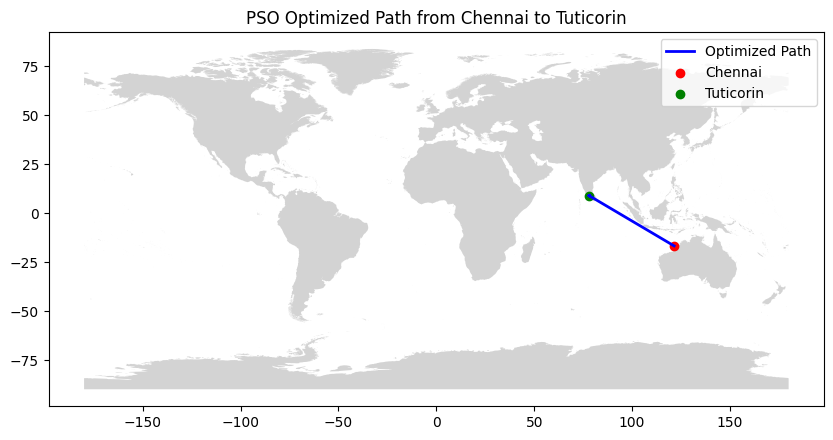

In [ ]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import LineString
from random import uniform

# Load the Natural Earth land polygons shapefile
land_shapefile_path = "natural-earth-vector-master/10m_physical/ne_10m_land.shp"
land_gdf = gpd.read_file(land_shapefile_path)

# PSO Parameters
num_particles = 50  # Number of particles in the swarm
num_iterations = 100  # Number of iterations
c1, c2 = 2.0, 2.0  # Cognitive and social coefficients
w = 0.5  # Inertia weight

# Problem parameters
start = np.array([121.506374, -16.871833,])  # Chennai (Longitude, Latitude)
end = np.array([78.13, 8.73])  # Tuticorin (Longitude, Latitude)

# Initialize the particles (random positions)
particles = [np.array([uniform(65, 100), uniform(0, 36)]) for _ in range(num_particles)]
velocities = [np.array([uniform(-1, 1), uniform(-1, 1)]) for _ in range(num_particles)]
best_particle_positions = particles[:]
global_best_position = min(particles, key=lambda p: np.linalg.norm(p - end))

# PSO main loop
for iteration in range(num_iterations):
    for i in range(num_particles):
        # Update velocity
        velocities[i] = (w * velocities[i] +
                         c1 * uniform(0, 1) * (best_particle_positions[i] - particles[i]) +
                         c2 * uniform(0, 1) * (global_best_position - particles[i]))
        # Update position
        particles[i] = particles[i] + velocities[i]
        
        # Ensure particles stay within bounds
        particles[i] = np.clip(particles[i], [65, 0], [100, 36])

        # Check if the new position is better
        if np.linalg.norm(particles[i] - end) < np.linalg.norm(best_particle_positions[i] - end):
            best_particle_positions[i] = particles[i]
        
        # Update global best
        if np.linalg.norm(particles[i] - end) < np.linalg.norm(global_best_position - end):
            global_best_position = particles[i]

# Visualize the final path
route = [start] + best_particle_positions + [end]
route_line = LineString(route)

fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('PSO Optimized Path from Chennai to Tuticorin')
land_gdf.plot(ax=ax, color='lightgrey')
ax.plot(*route_line.xy, color='blue', linewidth=2, label='Optimized Path')
ax.scatter(*start, color='red', label='Chennai')
ax.scatter(*end, color='green', label='Tuticorin')
ax.legend()
plt.show()


KeyboardInterrupt: 

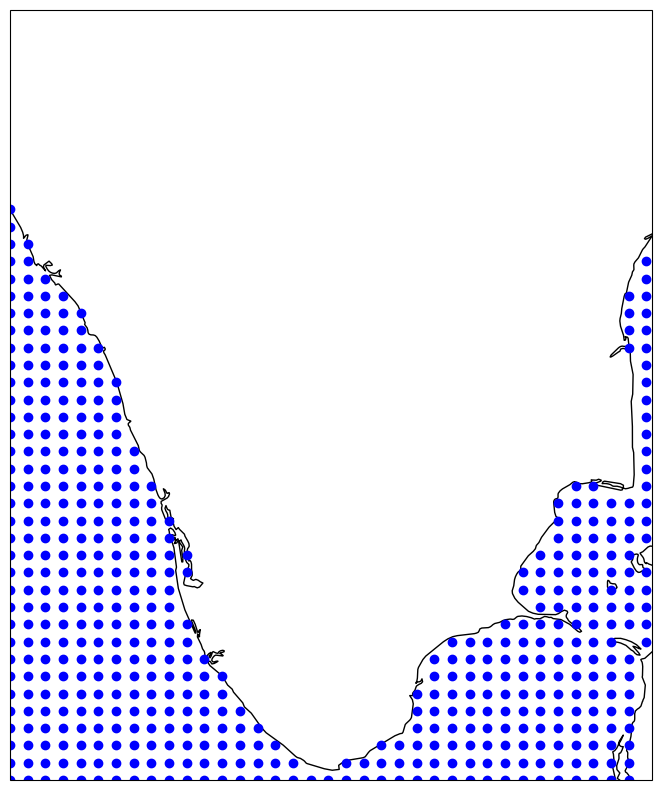

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from shapely.geometry import Polygon, Point
import numpy as np
from random import uniform

# Constants
GRID_CELL_SIZE_KM = 15
NUM_PARTICLES = 30
NUM_ITERATIONS = 100
TARGET_POINT = (80, 12)  # Example target point (longitude, latitude)

# Load the Natural Earth land polygons shapefile
land_shapefile_path = "natural-earth-vector-master/10m_physical/ne_10m_land.shp"
land_gdf = gpd.read_file(land_shapefile_path)

# Define the latitude and longitude range for South India
lat_range = np.arange(8, 14, GRID_CELL_SIZE_KM / 111.32)
lon_range = np.arange(75, 80, GRID_CELL_SIZE_KM / (111.32 * np.cos(np.radians(12))))

# Create the map
fig = plt.figure(figsize=(14, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([75, 80, 8, 14], crs=ccrs.PlateCarree())

# Add coastlines and borders
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Store sea points
sea_points = []

for lat in lat_range:
    for lon in lon_range:
        # Create a point
        point = Point(lon, lat)
        
        # Check if the point intersects with any land geometry
        if not land_gdf.intersects(point).any():
            sea_points.append((lon, lat))
            ax.plot(lon, lat, 'bo', transform=ccrs.PlateCarree())

# PSO algorithm to find a path from a start point to the target point
def pso_find_path(start_point, target_point, sea_points):
    def distance(p1, p2):
        return np.sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)
    
    particles = [uniform(0, len(sea_points) - 1) for _ in range(NUM_PARTICLES)]
    velocities = [uniform(-1, 1) for _ in range(NUM_PARTICLES)]
    best_positions = particles.copy()
    global_best = min(particles, key=lambda p: distance(sea_points[int(p)], target_point))
    
    for _ in range(NUM_ITERATIONS):
        for i in range(NUM_PARTICLES):
            # Update particle velocity and position
            velocities[i] = 0.5 * velocities[i] + 0.3 * uniform(0, 1) * (best_positions[i] - particles[i]) + 0.2 * uniform(0, 1) * (global_best - particles[i])
            particles[i] += velocities[i]
            
            # Keep particles within bounds
            particles[i] = max(0, min(len(sea_points) - 1, particles[i]))
            
            # Update personal and global bests
            if distance(sea_points[int(particles[i])], target_point) < distance(sea_points[int(best_positions[i])], target_point):
                best_positions[i] = particles[i]
            if distance(sea_points[int(particles[i])], target_point) < distance(sea_points[int(global_best)], target_point):
                global_best = particles[i]
    
    # Return the path found
    path = []
    current_point = start_point
    while distance(current_point, target_point) > GRID_CELL_SIZE_KM / 111.32:
        next_point = sea_points[int(global_best)]
        path.append(next_point)
        current_point = next_point
    
    return path

# Define start and target points
start_point = (76, 10)  # Example start point (longitude, latitude)
path = pso_find_path(start_point, TARGET_POINT, sea_points)

# Draw the path
for i in range(len(path) - 1):
    ax.plot([path[i][0], path[i + 1][0]], [path[i][1], path[i + 1][1]], 'r-', transform=ccrs.PlateCarree())

# Draw the start and target points
ax.plot(start_point[0], start_point[1], 'go', markersize=10, transform=ccrs.PlateCarree())  # Start point
ax.plot(TARGET_POINT[0], TARGET_POINT[1], 'ro', markersize=10, transform=ccrs.PlateCarree())  # Target point

plt.title('PSO Path Finding in South India Sea Region')
plt.show()


In [ ]:
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    
    # Distance in kilometers (Earth's radius = 6371 km)
    distance_km = 6371.0 * c
    return distance_km

In [ ]:
lat1 = 23.9933
long1 = 89.3232

print(haversine(lat1, long1, lat1 + (1/5), long1))


11.119492664456242


In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Sample data points
class GridPoint:
    def __init__(self, lat, lon, weather_risk_factor, current_speed, fuel_consumption):
        self.lat = lat
        self.lon = lon
        self.weather_risk_factor = weather_risk_factor
        self.current_speed = current_speed
        self.fuel_consumption = fuel_consumption

# Sample grid with random data
grid_size = 10
grid = [[GridPoint(lat, lon, random.uniform(0, 1), random.uniform(5, 20), random.uniform(0.5, 1.5)) for lon in range(grid_size)] for lat in range(grid_size)]

# Haversine distance calculation
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat / 2) ** 2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

# Cost functions
def calculate_safety_cost(neighbor):
    return neighbor.weather_risk_factor

def calculate_speed_cost(current, neighbor):
    distance = haversine(current.lat, current.lon, neighbor.lat, neighbor.lon)
    return distance / neighbor.current_speed

def calculate_fuel_cost(current, neighbor):
    return current.fuel_consumption

def evaluate_fitness(route, alpha, beta, gamma):
    total_safety_cost = 0
    total_speed_cost = 0
    total_fuel_cost = 0
    
    for i in range(len(route) - 1):
        current = route[i]
        neighbor = route[i + 1]
        
        total_safety_cost += alpha * calculate_safety_cost(neighbor)
        total_speed_cost += beta * calculate_speed_cost(current, neighbor)
        total_fuel_cost += gamma * calculate_fuel_cost(current, neighbor)
    
    return 1 / (total_safety_cost + total_speed_cost + total_fuel_cost)

def random_route(grid, start, end):
    route = [start]
    while route[-1] != end:
        current = route[-1]
        next_step = random.choice([(-1, 0), (1, 0), (0, -1), (0, 1)])
        next_point = (current[0] + next_step[0], current[1] + next_step[1])
        if valid_point(grid, next_point) and next_point not in route:
            route.append(next_point)
    return route

def valid_point(grid, point):
    row, col = point
    return 0 <= row < len(grid) and 0 <= col < len(grid[row])

def initialize_population(grid, start, end, population_size):
    return [random_route(grid, start, end) for _ in range(population_size)]

def select_parent(population, fitness_scores):
    max_fitness = sum(fitness_scores)
    pick = random.uniform(0, max_fitness)
    current = 0
    for i in range(len(population)):
        current += fitness_scores[i]
        if current > pick:
            return population[i]

def crossover(parent1, parent2):
    min_len = min(len(parent1), len(parent2))
    point = random.randint(1, min_len - 1)
    child1 = parent1[:point] + parent2[point:]
    child2 = parent2[:point] + parent1[point:]
    return child1, child2

def mutate(route, mutation_rate):
    if random.random() < mutation_rate:
        mutation_point = random.randint(0, len(route) - 1)
        new_point = random_route_point(route[mutation_point])
        if valid_point(grid, new_point):
            route[mutation_point] = new_point
    return route

def random_route_point(point):
    directions = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    next_step = random.choice(directions)
    new_point = (point[0] + next_step[0], point[1] + next_step[1])
    if 0 <= new_point[0] < grid_size and 0 <= new_point[1] < grid_size:
        return new_point
    else:
        return point

def ga_optimize_route(grid, start, end, alpha, beta, gamma, population_size=100, generations=1000, mutation_rate=0.01):
    population = initialize_population(grid, start, end, population_size)
    
    for generation in range(generations):
        fitness_scores = [evaluate_fitness([grid[p[0]][p[1]] for p in route], alpha, beta, gamma) for route in population]
        next_population = []
        
        for _ in range(population_size // 2):
            parent1 = select_parent(population, fitness_scores)
            parent2 = select_parent(population, fitness_scores)
            child1, child2 = crossover(parent1, parent2)
            next_population.extend([mutate(child1, mutation_rate), mutate(child2, mutation_rate)])
        
        population = next_population
    
    best_route = max(population, key=lambda route: evaluate_fitness([grid[p[0]][p[1]] for p in route], alpha, beta, gamma))
    
    return best_route

def plot_route(grid, route, title):
    plt.figure(figsize=(10, 10))
    lats = [grid[p[0]][p[1]].lat for p in route]
    lons = [grid[p[0]][p[1]].lon for p in route]
    
    plt.plot(lons, lats, marker='o')
    plt.title(title)
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.grid(True)
    plt.show()

# Parameters
start = (0, 0)
end = (9, 9)
alpha = 1  # Safety importance
beta = 1  # Speed importance
gamma = 1  # Fuel importance

# Run GA
initial_route = random_route(grid, start, end)
optimized_route = ga_optimize_route(grid, start, end, alpha, beta, gamma, population_size=5, generations=10, mutation_rate=0.05)

# Visualization
plot_route(grid, initial_route, "Initial Random Route")
plot_route(grid, optimized_route, "Optimized Route with GA")


KeyboardInterrupt: 

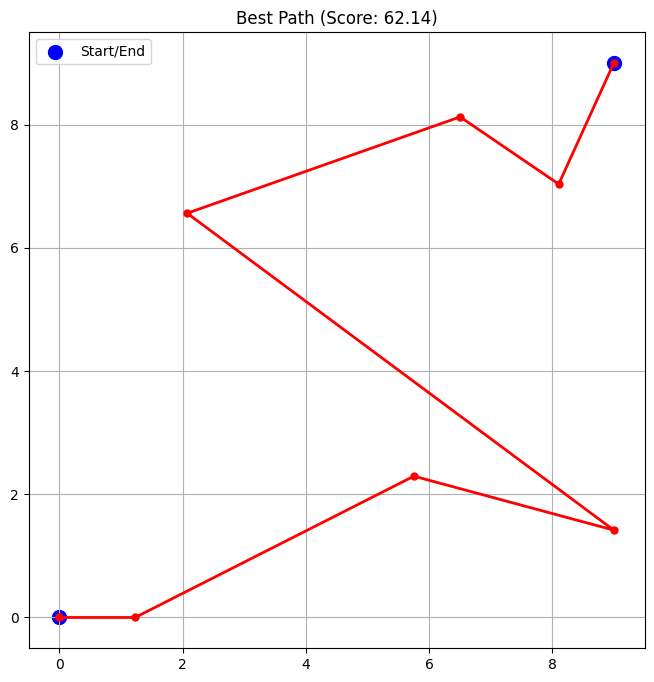

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants for the PSO
NUM_PARTICLES = 50
MAX_ITER = 100
INERTIA_WEIGHT = 0.5
COGNITIVE_WEIGHT = 1.5
SOCIAL_WEIGHT = 2.0

# Grid dimensions and start/end points
grid_width = 10
grid_height = 10
start_point = (0, 0)
end_point = (9, 9)

# Fitness function to evaluate each particle's position (path)
def evaluate_fitness(path, grid):
    safety_factor = 1.0  # Example: lower value for unsafe areas
    speed_factor = 1.0   # Example: higher value for faster routes
    fuel_efficiency = 1.0  # Example: lower value for higher fuel consumption

    # Calculate the path length
    path_length = sum(np.sqrt((path[i][0] - path[i + 1][0])**2 + (path[i][1] - path[i + 1][1])**2) for i in range(len(path) - 1))

    # Calculate the fitness score
    fitness = safety_factor * path_length + speed_factor * path_length + fuel_efficiency * path_length
    return fitness

# Initialize particles (random paths)
def initialize_particles(num_particles, grid):
    particles = []
    for _ in range(num_particles):
        path = [start_point]
        for _ in range(grid_width - 2):
            next_point = (np.random.randint(0, grid_width), np.random.randint(0, grid_height))
            path.append(next_point)
        path.append(end_point)
        particles.append(path)
    return particles

# Update particle velocities and positions
def update_particles(particles, velocities, p_best, g_best):
    for i in range(len(particles)):
        for j in range(1, len(particles[i]) - 1):  # Exclude start and end points
            r1, r2 = np.random.rand(), np.random.rand()
            velocities[i][j] = (INERTIA_WEIGHT * velocities[i][j] +
                                COGNITIVE_WEIGHT * r1 * (np.array(p_best[i][j]) - np.array(particles[i][j])) +
                                SOCIAL_WEIGHT * r2 * (np.array(g_best[j]) - np.array(particles[i][j])))

            # Update the particle's position
            particles[i][j] += velocities[i][j]
            # Keep particles within grid bounds
            particles[i][j][0] = np.clip(particles[i][j][0], 0, grid_width - 1)
            particles[i][j][1] = np.clip(particles[i][j][1], 0, grid_height - 1)

    return particles, velocities

# PSO algorithm
def pso_pathfinding(grid, start, end):
    # Initialize particles and velocities
    particles = initialize_particles(NUM_PARTICLES, grid)
    velocities = [np.zeros_like(particles[0], dtype=float) for _ in range(NUM_PARTICLES)]
    
    # Initialize personal best positions and global best position
    p_best = particles[:]
    p_best_scores = [evaluate_fitness(p, grid) for p in particles]
    g_best = particles[np.argmin(p_best_scores)]
    g_best_score = min(p_best_scores)
    
    for iteration in range(MAX_ITER):
        # Update particles
        particles, velocities = update_particles(particles, velocities, p_best, g_best)

        # Update personal best positions and global best position
        for i in range(NUM_PARTICLES):
            fitness = evaluate_fitness(particles[i], grid)
            if fitness < p_best_scores[i]:
                p_best[i] = particles[i]
                p_best_scores[i] = fitness
        g_best = p_best[np.argmin(p_best_scores)]
        g_best_score = min(p_best_scores)

    return g_best, g_best_score

# Visualization function
def plot_path(grid, path, title):
    plt.figure(figsize=(8, 8))
    plt.imshow(grid, cmap='Greys', origin='lower')
    path = np.array(path)
    plt.plot(path[:, 1], path[:, 0], 'ro-', linewidth=2, markersize=5)
    plt.scatter([start_point[1], end_point[1]], [start_point[0], end_point[0]], c='blue', s=100, label="Start/End")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
grid = np.zeros((grid_width, grid_height))  # A simple grid (0 for open space)

# Run PSO
best_path, best_score = pso_pathfinding(grid, start_point, end_point)

# Visualization
plot_path(grid, best_path, f"Best Path (Score: {best_score:.2f})")


In [ ]:
%pip install requests

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import requests

# Define your API key
API_KEY = '8b71cf2c512b12b18e107dbfe5a3a21d'


# Define the bounding box coordinates
# Format: lon_left, lat_bottom, lon_right, lat_top, zoom
# Example: for a region covering part of the US
lon_left = 60
lat_bottom = 0.0
lon_right = 100
lat_top = 26
zoom = 10  # Higher zoom level results in more precise data but more points

# Construct the API endpoint for the bounding box
url = f"http://api.openweathermap.org/data/2.5/box/city?bbox={lon_left},{lat_bottom}&appid={API_KEY}"

# Send the request to the API
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON response
    data = response.json()
    
    # Print the weather data for each city in the bounding box
    for city in data['list']:
        name = city['name']
        temp = city['main']['temp'] - 273.15  # Convert temperature from Kelvin to Celsius
        weather = city['weather'][0]['description']
        print(f"City: {name}, Temperature: {temp:.2f}°C, Weather: {weather}")
else:
    print(f"Failed to get data: {response.status_code}, {response.text}")


Failed to get data: 401, {"cod":401, "message": "Invalid API key. Please see https://openweathermap.org/faq#error401 for more info."}


In [ ]:
%pip install openmeteo-requests
%pip install requests-cache retry-requests numpy pandas

In [ ]:
import openmeteo_requests

import requests_cache
import pandas as pd
from retry_requests import retry

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = 3600)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://api.open-meteo.com/v1/forecast"
params = {
	"latitude": [52.52, 52.52, 52.52, 52.52, 52.52],
	"longitude": [13.41, 13.41, 13.41, 13.41, 13.41],
	"hourly": ["temperature_2m", "pressure_msl", "surface_pressure", "wind_speed_10m", "wind_speed_80m", "wind_direction_10m", "wind_direction_80m"]
}
responses = openmeteo.weather_api(url, params=params)

# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process hourly data. The order of variables needs to be the same as requested.
hourly = response.Hourly()
hourly_temperature_2m = hourly.Variables(0).ValuesAsNumpy()
hourly_pressure_msl = hourly.Variables(1).ValuesAsNumpy()
hourly_surface_pressure = hourly.Variables(2).ValuesAsNumpy()
hourly_wind_speed_10m = hourly.Variables(3).ValuesAsNumpy()
hourly_wind_speed_80m = hourly.Variables(4).ValuesAsNumpy()
hourly_wind_direction_10m = hourly.Variables(5).ValuesAsNumpy()
hourly_wind_direction_80m = hourly.Variables(6).ValuesAsNumpy()

hourly_data = {"date": pd.date_range(
	start = pd.to_datetime(hourly.Time(), unit = "s", utc = True),
	end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = hourly.Interval()),
	inclusive = "left"
)}
hourly_data["temperature_2m"] = hourly_temperature_2m
hourly_data["pressure_msl"] = hourly_pressure_msl
hourly_data["surface_pressure"] = hourly_surface_pressure
hourly_data["wind_speed_10m"] = hourly_wind_speed_10m
hourly_data["wind_speed_80m"] = hourly_wind_speed_80m
hourly_data["wind_direction_10m"] = hourly_wind_direction_10m
hourly_data["wind_direction_80m"] = hourly_wind_direction_80m

hourly_dataframe = pd.DataFrame(data = hourly_data)
print(hourly_dataframe)

Coordinates 52.52000045776367°N 13.419998168945312°E
Elevation 38.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s
                         date  temperature_2m  pressure_msl  surface_pressure  \
0   2024-09-01 00:00:00+00:00       15.695499   1024.300049       1019.708923   
1   2024-09-01 01:00:00+00:00       15.245500   1024.300049       1019.701538   
2   2024-09-01 02:00:00+00:00       14.695499   1024.300049       1019.692932   
3   2024-09-01 03:00:00+00:00       14.445499   1023.400024       1018.792725   
4   2024-09-01 04:00:00+00:00       14.095500   1022.900024       1018.289673   
..                        ...             ...           ...               ...   
163 2024-09-07 19:00:00+00:00       24.169500   1010.599976       1006.198975   
164 2024-09-07 20:00:00+00:00       22.819500   1010.900024       1006.477478   
165 2024-09-07 21:00:00+00:00       21.669500   1011.000000       1006.559937   
166 2024-09-07 22:00:00+00:00       20.819500   1011.000000     

In [ ]:
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import openmeteo_requests
import requests_cache
import pandas as pd
from retry_requests import retry
import time
from itertools import product
from openpyxl import load_workbook

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after=3600)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = openmeteo_requests.Client(session=retry_session)

# Generate latitude and longitude pairs
latitudes = [round(x * 0.5, 1) for x in range(int(0.0 * 2), int(26.0 * 2) + 1)]
longitudes = [round(y * 0.5, 1) for y in range(int(60.0 * 2), int(100.0 * 2) + 1)]
location_pairs = list(product(latitudes, longitudes))

# Function to process each request and extract data
def process_request(latitudes, longitudes):
    url = "https://api.open-meteo.com/v1/forecast"
    params = {
        "latitude": latitudes,
        "longitude": longitudes,
        "hourly": [
            "temperature_2m", "pressure_msl", "surface_pressure",
            "wind_speed_10m", "wind_speed_80m",
            "wind_direction_10m", "wind_direction_80m"
        ]
    }
    return openmeteo.weather_api(url, params=params)

# Create an empty DataFrame to store all results
all_data = pd.DataFrame()

# Process the locations in batches
for i in range(0, len(location_pairs), 5):
    batch = location_pairs[i:i+5]
    lat_batch, lon_batch = zip(*batch)
    
    try:
        responses = process_request(lat_batch, lon_batch)

        # Process each response
        for response in responses:
            hourly = response.Hourly()
            hourly_data = {
                "latitude": response.Latitude(),
                "longitude": response.Longitude(),
                "date": pd.date_range(
                    start=pd.to_datetime(hourly.Time(), unit="s", utc=True),
                    end=pd.to_datetime(hourly.TimeEnd(), unit="s", utc=True),
                    freq=pd.Timedelta(seconds=hourly.Interval()),
                    inclusive="left"
                ),
                "temperature_2m": hourly.Variables(0).ValuesAsNumpy(),
                "pressure_msl": hourly.Variables(1).ValuesAsNumpy(),
                "surface_pressure": hourly.Variables(2).ValuesAsNumpy(),
                "wind_speed_10m": hourly.Variables(3).ValuesAsNumpy(),
                "wind_speed_80m": hourly.Variables(4).ValuesAsNumpy(),
                "wind_direction_10m": hourly.Variables(5).ValuesAsNumpy(),
                "wind_direction_80m": hourly.Variables(6).ValuesAsNumpy(),
            }
            
            hourly_df = pd.DataFrame(data=hourly_data)
            all_data = pd.concat([all_data, hourly_df], ignore_index=True)

        # Rate limiting: Sleep for 1 second after every 10 requests
        if (i // 5 + 1) % 10 == 0:
            time.sleep(1)

    except openmeteo_requests.OpenMeteoRequestsError as e:
        print(f"Error: {e}. Waiting before retrying...")
        time.sleep(60)  # Wait for 60 seconds before retrying

# Write the final DataFrame to an Excel file
excel_file = "weather_data.xlsx"
try:
    with pd.ExcelWriter(excel_file, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
        all_data.to_excel(writer, sheet_name='Weather Data', index=False)
except FileNotFoundError:
    all_data.to_excel(excel_file, sheet_name='Weather Data', index=False)

print(f"Weather data saved to '{excel_file}'.")


AttributeError: module 'openmeteo_requests' has no attribute 'OpenMeteoRequestsError'

In [ ]:
import openmeteo_requests
import requests_cache
import pandas as pd
from retry_requests import retry
import time
from itertools import product
from requests.exceptions import RequestException

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after=3600)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = openmeteo_requests.Client(session=retry_session)

# Generate latitude and longitude pairs
latitudes = [round(x * 0.5, 1) for x in range(int(0.0 * 2), int(26.0 * 2) + 1)]
longitudes = [round(y * 0.5, 1) for y in range(int(60.0 * 2), int(100.0 * 2) + 1)]
location_pairs = list(product(latitudes, longitudes))

# CSV file path
csv_file = "weather_data.csv"

# Initialize the CSV file with headers if it doesn't exist
header = True if not pd.io.common.file_exists(csv_file) else False

# Function to process each request and extract data
def process_request(latitudes, longitudes):
    url = "https://api.open-meteo.com/v1/forecast"
    params = {
        "latitude": latitudes,
        "longitude": longitudes,
        "hourly": [
            "temperature_2m", "pressure_msl", "surface_pressure",
            "wind_speed_10m", "wind_speed_80m",
            "wind_direction_10m", "wind_direction_80m"
        ]
    }
    return openmeteo.weather_api(url, params=params)

# Process the locations in batches
for i in range(0, len(location_pairs), 5):
    batch = location_pairs[i:i+5]
    lat_batch, lon_batch = zip(*batch)
    
    try:
        responses = process_request(lat_batch, lon_batch)

        # Process each response
        all_data = pd.DataFrame()
        for response in responses:
            hourly = response.Hourly()
            hourly_data = {
                "latitude": response.Latitude(),
                "longitude": response.Longitude(),
                "date": pd.date_range(
                    start=pd.to_datetime(hourly.Time(), unit="s", utc=True),
                    end=pd.to_datetime(hourly.TimeEnd(), unit="s", utc=True),
                    freq=pd.Timedelta(seconds=hourly.Interval()),
                    inclusive="left"
                ),
                "temperature_2m": hourly.Variables(0).ValuesAsNumpy(),
                "pressure_msl": hourly.Variables(1).ValuesAsNumpy(),
                "surface_pressure": hourly.Variables(2).ValuesAsNumpy(),
                "wind_speed_10m": hourly.Variables(3).ValuesAsNumpy(),
                "wind_speed_80m": hourly.Variables(4).ValuesAsNumpy(),
                "wind_direction_10m": hourly.Variables(5).ValuesAsNumpy(),
                "wind_direction_80m": hourly.Variables(6).ValuesAsNumpy(),
            }
            
            hourly_df = pd.DataFrame(data=hourly_data)
            all_data = pd.concat([all_data, hourly_df], ignore_index=True)

        # Write the DataFrame to the CSV file
        all_data.to_csv(csv_file, mode='a', header=header, index=False)
        header = False  # Disable header for subsequent writes

        # Rate limiting: Sleep for 1 second after every 10 requests
        if (i // 5 + 1) % 10 == 0:
            time.sleep(1)

    except RequestException as e:
        print(f"Error: {e}. Waiting before retrying...")
        time.sleep(60)  # Wait for 60 seconds before retrying


OpenMeteoRequestsError: {'error': True, 'reason': 'Minutely API request limit exceeded. Please try again in one minute.'}

In [1]:
import openmeteo_requests
import requests_cache
import pandas as pd
import numpy as np
import time
from retry_requests import retry
from requests.exceptions import RequestException

# Constants
GRID_CELL_SIZE_KM = 50  # Adjust this value based on the grid size
RATE_LIMIT_WAIT_TIME = 60  # Time to wait if rate limit exceeded (in seconds)
INITIAL_BACKOFF_TIME = 1  # Initial backoff time (in seconds)

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after=3600)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = openmeteo_requests.Client(session=retry_session)

# CSV file path
csv_file = "weather_data3.csv"

# Initialize the CSV file with headers if it doesn't exist
header = True if not pd.io.common.file_exists(csv_file) else False

# Function to calculate valid longitudes based on latitude
def get_longitudes_for_latitude(lat):
    lon_start = 60
    lon_end = 100
    lon_range = np.arange(lon_start, lon_end, GRID_CELL_SIZE_KM / (111.32 * np.cos(np.radians(lat))))
    return [lon for lon in lon_range]

# Function to process each request and extract data
def process_request(latitudes, longitudes):
    url = "https://api.open-meteo.com/v1/forecast"
    params = {
        "latitude": latitudes,
        "longitude": longitudes,
        "hourly": ["wind_speed_10m", "wind_direction_10m"],
        "forcast_days":7
    }
    return openmeteo.weather_api(url, params=params)

# Generate latitude and corresponding longitude pairs
location_pairs = []
lat_range = np.arange(0, 26, GRID_CELL_SIZE_KM / 111.32)[::-1]  # Latitudes from 0 to 26 degrees

for lat in lat_range:
    longitudes = get_longitudes_for_latitude(lat)
    location_pairs.extend([(lat, lon) for lon in longitudes])

# Process the locations in batches of 5
i = 0
backoff_time = INITIAL_BACKOFF_TIME
print(len(location_pairs))
while i < len(location_pairs):
    batch = location_pairs[i:i+20]
    lat_batch, lon_batch = zip(*batch)

    while True:  # Retry loop
        try:
            responses = process_request(lat_batch, lon_batch)

            # Process each response
            all_data = pd.DataFrame()
            for response in responses:
                hourly = response.Hourly()
                hourly_data = {
                    "latitude": response.Latitude(),
                    "longitude": response.Longitude(),
                    "date": pd.date_range(
                        start=pd.to_datetime(hourly.Time(), unit="s", utc=True),
                        end=pd.to_datetime(hourly.TimeEnd(), unit="s", utc=True),
                        freq=pd.Timedelta(seconds=hourly.Interval()),
                        inclusive="left"
                    ),
                    "wind_speed_10m": hourly.Variables(0).ValuesAsNumpy(),
                    "wind_direction_10m": hourly.Variables(1).ValuesAsNumpy(),
                }

                hourly_df = pd.DataFrame(data=hourly_data)
                all_data = pd.concat([all_data, hourly_df], ignore_index=True)

            # Write the DataFrame to the CSV file
            all_data.to_csv(csv_file, mode='a', header=header, index=False)
            header = False  # Disable header for subsequent writes

            if i % 500 == 0:
                time.sleep(1)

            # Reset backoff time after a successful request
            backoff_time = INITIAL_BACKOFF_TIME
            break  # Exit retry loop if successful

        except Exception as e:
            print(f"Error occurred: {e}. Waiting for {10} seconds before retrying...")
            time.sleep(10)
            # backoff_time = min(backoff_time * 2, 300)  # Exponential backoff, max 5 minutes

    i += 20  # Move to the next batch


5023
Error occurred: {'reason': 'Minutely API request limit exceeded. Please try again in one minute.', 'error': True}. Waiting for 10 seconds before retrying...
Error occurred: {'error': True, 'reason': 'Minutely API request limit exceeded. Please try again in one minute.'}. Waiting for 10 seconds before retrying...
Error occurred: {'reason': 'Minutely API request limit exceeded. Please try again in one minute.', 'error': True}. Waiting for 10 seconds before retrying...
Error occurred: {'error': True, 'reason': 'Minutely API request limit exceeded. Please try again in one minute.'}. Waiting for 10 seconds before retrying...
Error occurred: {'reason': 'Minutely API request limit exceeded. Please try again in one minute.', 'error': True}. Waiting for 10 seconds before retrying...
Error occurred: {'reason': 'Minutely API request limit exceeded. Please try again in one minute.', 'error': True}. Waiting for 10 seconds before retrying...
Error occurred: {'error': True, 'reason': 'Minutely A

KeyboardInterrupt: 

In [1]:
import openmeteo_requests
import requests_cache
import pandas as pd
import numpy as np
import time
from retry_requests import retry

# Constants
GRID_CELL_SIZE_KM = 50  # Adjust this value based on the grid size
RATE_LIMIT_WAIT_TIME = 60  # Time to wait if rate limit exceeded (in seconds)
INITIAL_BACKOFF_TIME = 1  # Initial backoff time (in seconds)

# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after=3600)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = openmeteo_requests.Client(session=retry_session)

# CSV file path
csv_file = "oceanweather.csv"

# Initialize the CSV file with headers if it doesn't exist
header = True if not pd.io.common.file_exists(csv_file) else False

# Function to calculate valid longitudes based on latitude
def get_longitudes_for_latitude(lat):
    lon_start = 60
    lon_end = 100
    lon_range = np.arange(lon_start, lon_end, GRID_CELL_SIZE_KM / (111.32 * np.cos(np.radians(lat))))
    return [lon for lon in lon_range]

# Function to process each request and extract data
def process_request(latitudes, longitudes):
    url = "https://api.open-meteo.com/v1/forecast"
    params = {
        "latitude": latitudes,
        "longitude": longitudes,
        "hourly": [
            "wind_speed_10m", "wind_direction_10m",
            "wave_height", "wave_direction", "wave_period",
            "wind_wave_height", "wind_wave_direction", "wind_wave_period",
            "swell_wave_height", "swell_wave_direction", "swell_wave_period",
            "ocean_current_velocity", "ocean_current_direction"
        ],
        "forecast_days": 7,
        "timezone": "GMT"
    }
    return openmeteo.weather_api(url, params=params)

# Generate latitude and corresponding longitude pairs
location_pairs = []
lat_range = np.arange(0, 26, GRID_CELL_SIZE_KM / 111.32)[::-1]  # Latitudes from 0 to 26 degrees

for lat in lat_range:
    longitudes = get_longitudes_for_latitude(lat)
    location_pairs.extend([(lat, lon) for lon in longitudes])

# Process the locations in batches of 20
i = 0
backoff_time = INITIAL_BACKOFF_TIME

while i < len(location_pairs):
    batch = location_pairs[i:i+5]
    lat_batch, lon_batch = zip(*batch)

    while True:  # Retry loop
        try:
            responses = process_request(lat_batch, lon_batch)

            # Process each response
            all_data = pd.DataFrame()
            for response in responses:
                hourly = response.Hourly()
                hourly_data = {
                    "latitude": response.Latitude(),
                    "longitude": response.Longitude(),
                    "date": pd.date_range(
                        start=pd.to_datetime(hourly.Time(), unit="s", utc=True),
                        end=pd.to_datetime(hourly.TimeEnd(), unit="s", utc=True),
                        freq=pd.Timedelta(seconds=hourly.Interval()),
                        inclusive="left"
                    ),
                    "wind_speed_10m": hourly.Variables(0).ValuesAsNumpy(),
                    "wind_direction_10m": hourly.Variables(1).ValuesAsNumpy(),
                    "wave_height": hourly.Variables(2).ValuesAsNumpy(),
                    "wave_direction": hourly.Variables(3).ValuesAsNumpy(),
                    "wave_period": hourly.Variables(4).ValuesAsNumpy(),
                    "wind_wave_height": hourly.Variables(5).ValuesAsNumpy(),
                    "wind_wave_direction": hourly.Variables(6).ValuesAsNumpy(),
                    "wind_wave_period": hourly.Variables(7).ValuesAsNumpy(),
                    "swell_wave_height": hourly.Variables(8).ValuesAsNumpy(),
                    "swell_wave_direction": hourly.Variables(9).ValuesAsNumpy(),
                    "swell_wave_period": hourly.Variables(10).ValuesAsNumpy(),
                    "ocean_current_velocity": hourly.Variables(11).ValuesAsNumpy(),
                    "ocean_current_direction": hourly.Variables(12).ValuesAsNumpy(),
                }

                hourly_df = pd.DataFrame(data=hourly_data)
                all_data = pd.concat([all_data, hourly_df], ignore_index=True)

            # Write the DataFrame to the CSV file
            all_data.to_csv(csv_file, mode='a', header=header, index=False)
            header = False  # Disable header for subsequent writes

            if i % 500 == 0:
                time.sleep(1)

            # Reset backoff time after a successful request
            backoff_time = INITIAL_BACKOFF_TIME
            break  # Exit retry loop if successful

        except Exception as e:
            print(f"Error occurred: {e}. Waiting for {20} seconds before retrying...")
            time.sleep(20)
            # time.sleep(backoff_time)
            # backoff_time = min(backoff_time * 2, 300)  # Exponential backoff, max 5 minutes

    i += 5 # Move to the next batch


Error occurred: {'reason': 'Hourly API request limit exceeded. Please try again in the next hour.', 'error': True}. Waiting for 20 seconds before retrying...
Error occurred: {'reason': 'Hourly API request limit exceeded. Please try again in the next hour.', 'error': True}. Waiting for 20 seconds before retrying...
Error occurred: {'error': True, 'reason': 'Hourly API request limit exceeded. Please try again in the next hour.'}. Waiting for 20 seconds before retrying...
Error occurred: {'reason': 'Hourly API request limit exceeded. Please try again in the next hour.', 'error': True}. Waiting for 20 seconds before retrying...


Time Step 1:
  Wind Speed: 11 m/s, Wind Direction: 10°
  Wave Height: 3 m, Wave Direction: 0°, Wave Frequency: 0.2 Hz
  Air Resistance: 0.00 N, Wave Resistance: 9998.10 N, Total Resistance: 9998.10 N
  Adjusted Speed: 1025.75 m/s

Time Step 2:
  Wind Speed: 11 m/s, Wind Direction: 10°
  Wave Height: 3 m, Wave Direction: 45°, Wave Frequency: 0.2 Hz
  Air Resistance: 0.00 N, Wave Resistance: 7069.72 N, Total Resistance: 7069.72 N
  Adjusted Speed: 1450.63 m/s

Time Step 3:
  Wind Speed: 11 m/s, Wind Direction: 10°
  Wave Height: 2.5 m, Wave Direction: 45°, Wave Frequency: 0.2 Hz
  Air Resistance: 0.00 N, Wave Resistance: 4909.53 N, Total Resistance: 4909.53 N
  Adjusted Speed: 2088.91 m/s

Time Step 4:
  Wind Speed: 12 m/s, Wind Direction: 20°
  Wave Height: 2.5 m, Wave Direction: 45°, Wave Frequency: 0.2 Hz
  Air Resistance: 0.00 N, Wave Resistance: 4909.53 N, Total Resistance: 4909.53 N
  Adjusted Speed: 2088.91 m/s

Time Step 5:
  Wind Speed: 12 m/s, Wind Direction: 20°
  Wave Height:

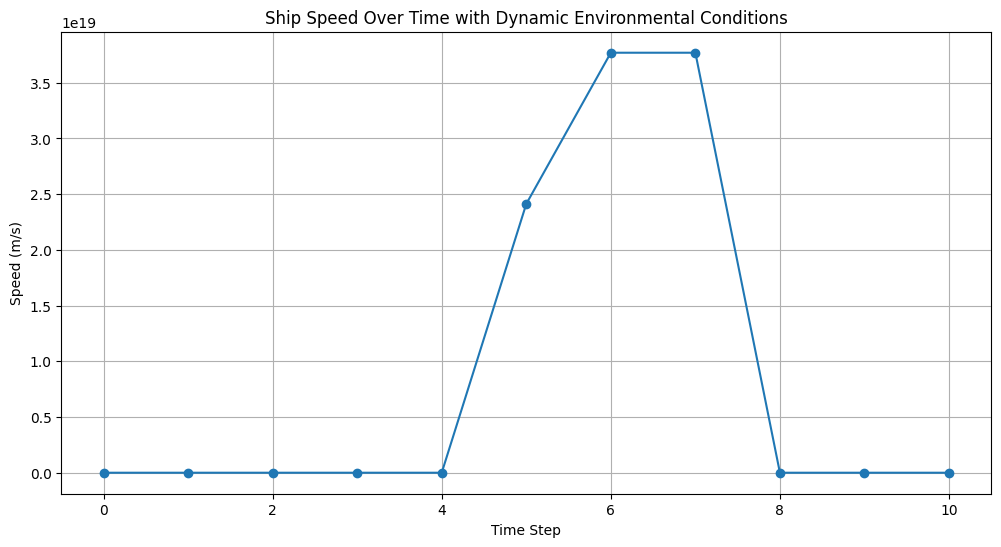

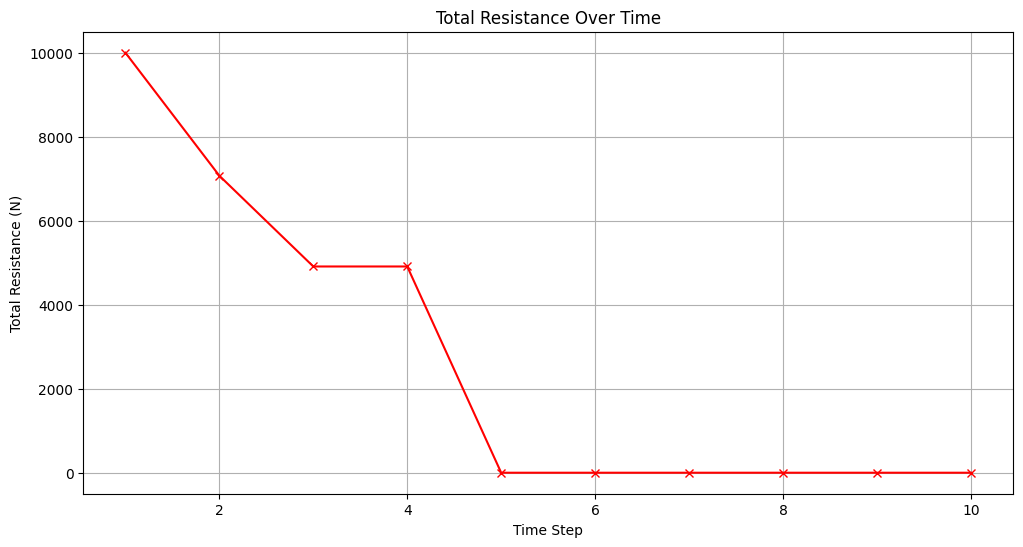

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Constants
AIR_DENSITY = 1.225  # kg/m³ at sea level
GRAVITY = 9.81  # m/s²

# Ship Specifications
class Ship:
    def __init__(self, max_speed_km_h, length_m, draft_m, breadth_m, displacement_m3, block_coefficient):
        self.max_speed_km_h = max_speed_km_h
        self.max_speed_m_s = max_speed_km_h / 3.6  # Convert to m/s
        self.length_m = length_m
        self.draft_m = draft_m
        self.breadth_m = breadth_m
        self.displacement_m3 = displacement_m3
        self.block_coefficient = block_coefficient
        self.frontal_area = self.breadth_m * self.draft_m  # m²
        self.drag_coefficient = 0.9  # Assumed for large ships
        self.alpha_wave = 0.15  # Empirical coefficient for wave resistance

    def power(self):
        # Assuming constant propulsion power based on maximum speed
        return self.max_speed_m_s * self.max_speed_m_s * self.displacement_m3 * GRAVITY * self.block_coefficient

# Environmental Conditions
class Environment:
    def __init__(self, wind_speed_m_s, wind_direction_deg, wave_height_m, wave_direction_deg, wave_frequency_hz):
        self.wind_speed_m_s = wind_speed_m_s  # Wind speed
        self.wind_direction_deg = wind_direction_deg  # 0 degrees = ship's heading
        self.wave_height_m = wave_height_m  # Significant wave height
        self.wave_direction_deg = wave_direction_deg  # 0 degrees = ship's heading
        self.wave_frequency_hz = wave_frequency_hz  # Wave frequency

# Resistance Calculations
def calculate_air_resistance(ship, env):
    # Relative wind speed considering wind direction
    wind_dir_rad = math.radians(env.wind_direction_deg)
    ship_heading_rad = math.radians(0)  # Assuming ship heading is 0 degrees
    relative_wind_speed = ship.max_speed_m_s - env.wind_speed_m_s * math.cos(wind_dir_rad - ship_heading_rad)
    
    # Ensure relative wind speed is positive
    relative_wind_speed = max(relative_wind_speed, 0)
    
    R_a = 0.5 * AIR_DENSITY * ship.drag_coefficient * ship.frontal_area * relative_wind_speed**2
    return R_a, relative_wind_speed

def calculate_wave_resistance(ship, env):
    # Angle between wave direction and ship's heading
    wave_dir_rad = math.radians(env.wave_direction_deg)
    ship_heading_rad = math.radians(0)  # Assuming ship heading is 0 degrees
    theta = wave_dir_rad - ship_heading_rad
    R_w = ship.alpha_wave * env.wave_height_m**2 * ship.length_m * ship.breadth_m * math.cos(theta)
    # Ensure wave resistance is non-negative
    R_w = max(R_w, 0)
    return R_w

def calculate_total_resistance(R_a, R_w):
    return R_a + R_w

def calculate_speed_reduction(ship, R_total, power):
    # P = R_total * V => V_new = P / R_total
    # To prevent division by zero
    if R_total <= 0:
        return ship.max_speed_m_s
    V_new = power / R_total
    return V_new

# Simulation of Dynamic Conditions
def simulate(ship, env_initial, time_steps, env_changes):
    """
    ship: Ship object
    env_initial: Initial Environment object
    time_steps: Number of time steps to simulate
    env_changes: List of functions that modify the environment at each time step
    """
    # Initialize
    speed_history = [ship.max_speed_m_s]
    time_history = [0]
    R_total_history = []
    env = env_initial
    power = ship.power()

    for t in range(1, time_steps + 1):
        # Apply environmental changes
        if t-1 < len(env_changes):
            env = env_changes[t-1](env)
        
        # Calculate resistances
        R_a, rel_wind = calculate_air_resistance(ship, env)
        R_w = calculate_wave_resistance(ship, env)
        R_total = calculate_total_resistance(R_a, R_w)
        R_total_history.append(R_total)
        
        # Calculate new speed
        V_new = calculate_speed_reduction(ship, R_total, power)
        speed_history.append(V_new)
        time_history.append(t)
        
        print(f"Time Step {t}:")
        print(f"  Wind Speed: {env.wind_speed_m_s} m/s, Wind Direction: {env.wind_direction_deg}°")
        print(f"  Wave Height: {env.wave_height_m} m, Wave Direction: {env.wave_direction_deg}°, Wave Frequency: {env.wave_frequency_hz} Hz")
        print(f"  Air Resistance: {R_a:.2f} N, Wave Resistance: {R_w:.2f} N, Total Resistance: {R_total:.2f} N")
        print(f"  Adjusted Speed: {V_new:.2f} m/s\n")
    
    return time_history, speed_history, R_total_history

# Example Environment Change Functions
def increase_wind(env):
    env.wind_speed_m_s += 1  # Increase wind speed by 1 m/s
    env.wind_direction_deg = (env.wind_direction_deg + 10) % 360  # Rotate wind direction by 10 degrees
    return env

def decrease_wave_height(env):
    env.wave_height_m = max(env.wave_height_m - 0.5, 0)  # Decrease wave height by 0.5 m
    return env

def change_wave_direction(env):
    env.wave_direction_deg = (env.wave_direction_deg + 45) % 360  # Change wave direction by 45 degrees
    return env

# Initialize Ship and Environment
ship = Ship(
    max_speed_km_h=20,
    length_m=230,
    draft_m=10.8,
    breadth_m=32.2,
    displacement_m3=52030,
    block_coefficient=0.651
)

initial_env = Environment(
    wind_speed_m_s=10,         # Initial wind speed
    wind_direction_deg=0,      # Wind coming from ship's heading
    wave_height_m=3,           # Initial wave height
    wave_direction_deg=0,      # Waves coming from ship's heading
    wave_frequency_hz=0.2      # Example wave frequency
)

# Define Environmental Changes Over Time Steps
# For example, over 10 time steps, wind increases and wave conditions change
env_changes = [
    increase_wind,
    change_wave_direction,
    decrease_wave_height,
    increase_wind,
    change_wave_direction,
    decrease_wave_height,
    increase_wind,
    change_wave_direction,
    decrease_wave_height,
    increase_wind
]

# Run Simulation
time_steps = 10
time_history, speed_history, R_total_history = simulate(ship, initial_env, time_steps, env_changes)

# Plotting the Results
plt.figure(figsize=(12, 6))
plt.plot(time_history, speed_history, marker='o')
plt.title('Ship Speed Over Time with Dynamic Environmental Conditions')
plt.xlabel('Time Step')
plt.ylabel('Speed (m/s)')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(time_history[1:], R_total_history, marker='x', color='red')
plt.title('Total Resistance Over Time')
plt.xlabel('Time Step')
plt.ylabel('Total Resistance (N)')
plt.grid(True)
plt.show()


In [2]:
import numpy as np

# Constants
AIR_DENSITY = 1.225  # kg/m^3, density of air at sea level
WATER_DENSITY = 1025  # kg/m^3, density of seawater
GRAVITY = 9.81  # m/s^2, acceleration due to gravity

# Ship specifications
ship_speed = 20 * 1000 / 3600  # converting km/h to m/s
length = 230  # m
draft = 10.8  # m
breadth = 32.2  # m
displacement = 52030  # m^3
block_coefficient = 0.651
drag_coefficient = 0.9  # Assuming a typical drag coefficient
frontal_area = breadth * draft  # m^2

# Environmental data (examples)
Tdir = 45  # degrees, peak wave direction
Tper = 10  # seconds, peak wave period
Thgt = 3  # meters, significant wave height
sdir = 60  # degrees, swell peak wave direction
sper = 12  # seconds, swell peak wave period
shgt = 2  # meters, swell significant wave height
wdir = 30  # degrees, wind peak wave direction
wper = 8  # seconds, wind peak wave period
whgt = 4  # meters, wind significant wave height
wind_speed = 15  # m/s, wind speed

# Calculate Froude number
def calculate_froude_number(V, L):
    return V / np.sqrt(GRAVITY * L)

# Air Resistance Calculation
def calculate_air_resistance(V, wind_speed, frontal_area, drag_coefficient):
    V_rel = np.abs(V - wind_speed)
    air_resistance = 0.5 * AIR_DENSITY * drag_coefficient * frontal_area * (V_rel ** 2)
    return air_resistance

# Wave Resistance Calculation (simplified empirical approach)
def calculate_wave_resistance(V, L, wave_height, froude_number, C_w=0.0015):
    k = wave_height / L  # This is a very simplified relationship
    wave_resistance = k * C_w * WATER_DENSITY * L**2 * V**2
    return wave_resistance

# Safety Cost Function
def safety_cost_function(wave_height, wind_speed, wave_direction, ship_direction, alpha=1, beta=0.5, gamma=0.1):
    relative_wave_direction = np.abs(wave_direction - ship_direction)
    safety_cost = alpha * wave_height + beta * wind_speed + gamma * relative_wave_direction
    return safety_cost

# Calculate Froude number
froude_number = calculate_froude_number(ship_speed, length)

# Calculate Air Resistance
air_resistance = calculate_air_resistance(ship_speed, wind_speed, frontal_area, drag_coefficient)

# Calculate Wave Resistance
wave_resistance = calculate_wave_resistance(ship_speed, length, Thgt, froude_number)

# Calculate Safety Cost for Current Route
ship_direction = 90  # degrees, current ship heading
safety_cost = safety_cost_function(Thgt, wind_speed, Tdir, ship_direction)

# Print results
print(f"Froude Number: {froude_number}")
print(f"Air Resistance: {air_resistance:.2f} N")
print(f"Wave Resistance: {wave_resistance:.2f} N")
print(f"Safety Cost: {safety_cost:.2f}")

# Real-time adjustment of course based on safety cost
def adjust_course_for_safety(current_direction, environmental_data):
    Tdir, Tper, Thgt, sdir, sper, shgt, wdir, wper, whgt = environmental_data
    wind_speed = 15  # m/s, example wind speed

    # Calculate safety cost for the current direction
    current_safety_cost = safety_cost_function(Thgt, wind_speed, Tdir, current_direction)

    # Try small adjustments to see if safety can be improved
    best_direction = current_direction
    best_safety_cost = current_safety_cost
    for adjustment in range(-10, 11, 5):  # Try adjusting by +/- 10 degrees
        new_direction = current_direction + adjustment
        new_safety_cost = safety_cost_function(Thgt, wind_speed, Tdir, new_direction)
        if new_safety_cost < best_safety_cost:
            best_safety_cost = new_safety_cost
            best_direction = new_direction

    return best_direction, best_safety_cost

# Adjust course for safety
new_direction, new_safety_cost = adjust_course_for_safety(ship_direction, (Tdir, Tper, Thgt, sdir, sper, shgt, wdir, wper, whgt))
print(f"Adjusted Direction: {new_direction} degrees")
print(f"New Safety Cost: {new_safety_cost:.2f}")


Froude Number: 0.11695776840371312
Air Resistance: 17099.41 N
Wave Resistance: 32743.06 N
Safety Cost: 15.00
Adjusted Direction: 80 degrees
New Safety Cost: 14.00


In [7]:

import csv

with open("grid_points_with_bathymetry_updated_with_25km.csv", "r") as f:
    data = csv.reader(f)
    next(data)
    count = 0
    for row in data:
        if row[2] == '0':
            count += 1
    
    print(count)

84637


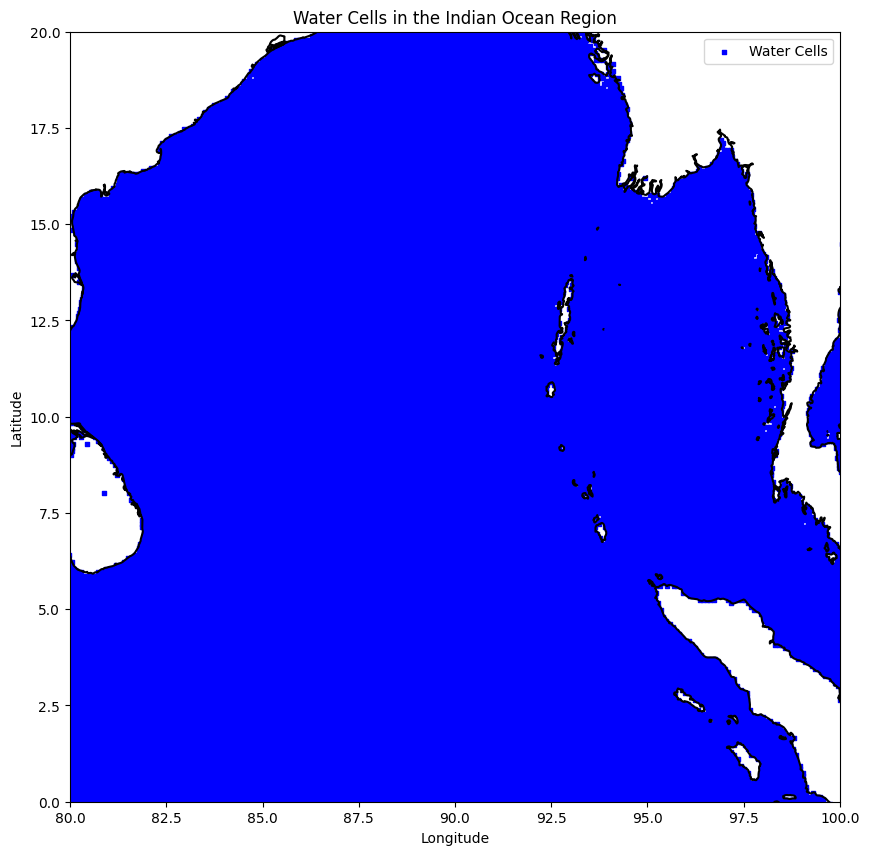

In [2]:
import matplotlib.pyplot as plt
import geopandas as gpd
import csv

# Load the coastline shapefile
coastlines = gpd.read_file("natural-earth-vector-master/10m_physical/ne_10m_coastline.shp")

# Initialize lists for latitudes and longitudes of water cells
water_latitudes = []
water_longitudes = []

# Read the grid file
with open("grid_points_with_bathymetry_updated_with_10km.csv", "r") as f:
    data = csv.reader(f)
    next(data)  # Skip the header
    for row in data:
        lat = float(row[0])
        lon = float(row[1])
        is_land = int(row[2])
        if is_land == 0:  # Water cell
            water_latitudes.append(lat)
            water_longitudes.append(lon)

# Plot the coastlines
fig, ax = plt.subplots(figsize=(10, 10))
coastlines.plot(ax=ax, color='black')

# Plot the water cells
ax.scatter(water_longitudes, water_latitudes, color='blue', s=10, marker='s', label="Water Cells")

# Set plot limits to focus on the Indian Ocean region
ax.set_xlim([80, 100])
ax.set_ylim([0, 20])

# Add labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Water Cells in the Indian Ocean Region')
ax.legend()

# Show the plot
plt.show()


In [4]:
%pip install simplekml

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for simplekml: filename=simplekml-1.3.6-py3-none-any.whl size=65876 sha256=47969a12989bd5bce95d31fbfb7df5b031a6108a0f9fa89e44b9ecadc5ac32df
  Stored in directory: c:\users\mathi vasan\appdata\local\pip\cache\wheels\83\ee\f2\65cecfd948f1429ead035fd6d56bc6bd6574a636ddc4d65cbd
Successfully built simplekml
Note: you may need to restart the kernel to use updated packages.


In [5]:
import csv
from simplekml import Kml

# Path to your CSV file
csv_file = "path.csv"
kml_file = "output.kml"

# Initialize KML object
kml = Kml()

# Open the CSV file and read the data
with open(csv_file, 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    header = next(csvreader)  # Skip the header if present
    
    for row in csvreader:
        if len(row) < 2:
            # Skip rows that don't have enough data
            continue

        latitude = float(row[0])
        longitude = float(row[1])
        description = row[2] if len(row) > 2 else "No description"  # Replace with your own attribute

        # Create a point in KML
        kml.newpoint(name="Point", coords=[(longitude, latitude)], description=description)

# Save the KML to a file
kml.save(kml_file)
print(f"KML file '{kml_file}' has been created.")


KML file 'output.kml' has been created.


**IsoChrone**

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from geopy.distance import geodesic
from math import radians, degrees, sin, cos, atan2
import geopandas as gpd
from shapely.geometry import Point

# Constants for the ship and environmental resistance factors
SHIP_MAX_SPEED = 15  # knots

# Resistance factors (these are simplified and can be adjusted)
WIND_RESISTANCE_FACTOR = 0.98  # Speed reduction factor per knot of wind
WAVE_RESISTANCE_FACTOR = 0.95  # Speed reduction factor per meter of wave height

# Example environmental conditions (can be dynamically fetched in a real scenario)
current_conditions = {
    'wind_speed': 20,  # knots
    'wave_height': 3,  # meters
}

# Function to calculate adjusted ship speed based on environmental conditions
def calculate_adjusted_speed(base_speed, wind_speed, wave_height):
    adjusted_speed = base_speed * (WIND_RESISTANCE_FACTOR ** wind_speed) * (WAVE_RESISTANCE_FACTOR ** wave_height)
    return max(adjusted_speed, 0)

# Function to calculate the initial bearing between two points
def calculate_initial_bearing(start_lat, start_lon, target_lat, target_lon):
    start_lat_rad = radians(start_lat)
    start_lon_rad = radians(start_lon)
    target_lat_rad = radians(target_lat)
    target_lon_rad = radians(target_lon)

    diff_lon = target_lon_rad - start_lon_rad

    x = sin(diff_lon) * cos(target_lat_rad)
    y = cos(start_lat_rad) * sin(target_lat_rad) - (sin(start_lat_rad) * cos(target_lat_rad) * cos(diff_lon))

    initial_bearing_rad = atan2(x, y)
    initial_bearing_deg = degrees(initial_bearing_rad)
    # Normalize to 0-360 degrees
    compass_bearing = (initial_bearing_deg + 360) % 360

    return compass_bearing

# Function to move a point in a certain direction based on speed and time
def move_point(lat, lon, direction, speed, time_step):
    # Convert speed from knots to km/h (1 knot = 1.852 km/h)
    distance_km = speed * time_step * 1.852
    # Calculate the new point using geodesic distance
    new_point = geodesic(kilometers=distance_km).destination((lat, lon), direction)
    return new_point.latitude, new_point.longitude, distance_km

# Function to perform isochrone search
def isochrone_search(start_lat, start_lon, target_lat, target_lon, time_step=1, max_iterations=1000):
    current_lat, current_lon = start_lat, start_lon
    path = [(current_lat, current_lon)]
    total_distance = 0
    
    for _ in range(max_iterations):
        # Calculate the direction to the target
        direction = calculate_initial_bearing(current_lat, current_lon, target_lat, target_lon)
        # Calculate the adjusted speed
        speed = calculate_adjusted_speed(SHIP_MAX_SPEED, current_conditions['wind_speed'], current_conditions['wave_height'])
        # Move towards the target
        current_lat, current_lon, distance_km = move_point(current_lat, current_lon, direction, speed, time_step)
        # Save the new position
        path.append((current_lat, current_lon))
        total_distance += distance_km
        
        # Check if close enough to the target
        if geodesic((current_lat, current_lon), (target_lat, target_lon)).km < 10:
            break

    return path, total_distance

# Set start and end coordinates (Chennai and Jakarta)
chennai_coords = (13.0827, 80.2707)
jakarta_coords = (-6.2088, 106.8456)

# Perform isochrone search
path, total_distance = isochrone_search(chennai_coords[0], chennai_coords[1], jakarta_coords[0], jakarta_coords[1])

# Print total distance travelled
print(f"Total Distance Travelled: {total_distance:.2f} km")

# Plotting the path on the Indian subcontinent map
lats, lons = zip(*path)

# Load the Natural Earth dataset (update the path to where you've extracted the shapefile)
shapefile_path = 'natural-earth-vector-master/10m_cultural/ne_10m_admin_0_countries.shp'
world = gpd.read_file(shapefile_path)

# Filter for relevant countries (India and Indonesia for the map)
countries_of_interest = ["India", "Indonesia", "Bangladesh", "Sri Lanka"]
india_map = world[world['name'].isin(countries_of_interest)]

# Plot the map and the route
plt.figure(figsize=(12, 8))
india_map.plot(ax=plt.gca(), color='lightgray')
plt.plot(lons, lats, marker='o', color='b', linestyle='-', markersize=4, label='Ship Path')
plt.title("Isochrone Path from Chennai to Jakarta")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.grid(True)
plt.show()


Total Distance Travelled: 3625.43 km


KeyError: 'name'

**saving objects to files**

In [4]:
import pickle
import csv
import numpy as np
from models.cell import GridCell

def generate_grid():
    columns_file = 'num_columns_per_row_10km.csv'
    num_cols_per_row = []

    with open(columns_file, 'r') as col_file:
        col_reader = csv.reader(col_file)
        next(col_reader)  # Skip the header

        for row in col_reader:
            num_cols_per_row.append(int(row[1]))

    num_rows = len(num_cols_per_row)

    grid = [np.empty(num_cols_per_row[row_idx], dtype=object) for row_idx in range(num_rows)]

    all_points = []
    grid_cells = []
    points_to_ind = {}


    with open('grid_points_with_bathymetry_updated_with_10km.csv', 'r') as file:
        reader = csv.reader(file)
        next(reader)  # Skip the header
        o = 0
        for row in reader:
            lat, lon, is_land, bathymetry_depth, row_idx, col_idx = float(row[0]), float(row[1]), int(row[2]), float(row[3]), int(row[4]), int(row[5])

            cell = GridCell(lat, lon, is_land, bathymetry_depth)
            if not is_land:
                o += 1
            
            grid[row_idx][col_idx] = cell

            points_to_ind[(lat, lon)] = (row_idx, col_idx)

            all_points.append([lat, lon])
            grid_cells.append(cell)
        print("Total Ocean cells: ", o)

        points_to_bathy = {}

    with open('objects/grid.pkl', 'wb') as f:
        pickle.dump(grid, f)

    with open('objects/num_cols_per_row.pkl','wb') as f:
        pickle.dump(num_cols_per_row, f)

    with open('objects/all_points.pkl', 'wb') as f:
        pickle.dump(all_points, f)

    with open('objects/points_to_ind.pkl', 'wb') as f:
        pickle.dump(points_to_ind, f)

    with open('objects/grid_cells.pkl', 'wb') as f:
        pickle.dump(grid_cells, f)

    return grid, all_points, grid_cells, points_to_ind, num_cols_per_row, points_to_bathy

generate_grid()

Total Ocean cells:  528337


([array([<models.cell.GridCell object at 0x000001BEAA366990>,
         <models.cell.GridCell object at 0x000001BEAA367E00>, ...,
         <models.cell.GridCell object at 0x000001BEAB431820>], dtype=object),
  array([<models.cell.GridCell object at 0x000001BEAB431880>,
         <models.cell.GridCell object at 0x000001BEAB431940>, ...,
         <models.cell.GridCell object at 0x000001BEAB49D280>], dtype=object),
  array([<models.cell.GridCell object at 0x000001BEAB49D2E0>,
         <models.cell.GridCell object at 0x000001BEAB49D3A0>, ...,
         <models.cell.GridCell object at 0x000001BEAB504CE0>], dtype=object),
  array([<models.cell.GridCell object at 0x000001BEAB504D40>,
         <models.cell.GridCell object at 0x000001BEAB504E00>, ...,
         <models.cell.GridCell object at 0x000001BEAB5707A0>], dtype=object),
  array([<models.cell.GridCell object at 0x000001BEAB570800>,
         <models.cell.GridCell object at 0x000001BEAB5708C0>, ...,
         <models.cell.GridCell object at 0x

In [10]:
import geopandas as gpd
from shapely.geometry import Point
import time

# Load the Natural Earth 10m coastline and land shapefiles
coastlines = gpd.read_file('projectmaterials/natural-earth-vector-master/10m_physical/ne_10m_coastline.shp')
land = gpd.read_file('projectmaterials/natural-earth-vector-master/10m_physical/ne_10m_land.shp')

print(coastlines.columns)
print(land.columns)

# Example latitude and longitude point
latitude = -20.9716
longitude = 77.5946

# Create a Shapely point from the latitude and longitude
point = Point(longitude, latitude)

# Check if the point intersects with the coastline
intersecting_coastline = coastlines[coastlines.intersects(point)]

# If there's an intersection, retrieve the intersecting geometry
if not intersecting_coastline.empty:
    for idx, coastline in intersecting_coastline.iterrows():
        intersection_point = coastline.geometry.intersection(point)
        print(f"Intersection found with coastline at: {intersection_point}")
else:
    print(f"No intersection with coastline at ({latitude}, {longitude}).")

# Check if the point intersects with land
intersecting_land = land[land.intersects(point)]
# If there's an intersection, retrieve the intersecting geometry for land
t = time.time()
if not intersecting_land.empty:
    for idx, landmass in intersecting_land.iterrows():
        intersection_point = landmass.geometry.intersection(point)
        print(f"Intersection found with land at: {intersection_point}")
else:
    print(f"The point ({latitude}, {longitude}) does not intersect with land.")
x = time.time()
print(x-t)

Index(['featurecla', 'scalerank', 'min_zoom', 'geometry'], dtype='object')
Index(['featurecla', 'scalerank', 'min_zoom', 'geometry'], dtype='object')
No intersection with coastline at (-20.9716, 77.5946).
The point (-20.9716, 77.5946) does not intersect with land.
0.0
